# Исследование объявлений о продаже квартир

**Исходные данные:** данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Цель:**

    1.   Научиться определять рыночную стоимость объектов недвижимости
    2.   Установить параметры опрееления рыночной стоимости
    3.   Построить автоматизированную систему для отслеживания аномалий и мошенической деятельности.

**Этапы исследования:**


1.   Загрузка исходных данных и их общая оценка, построение гистограмм для каждого столбца с числовыми значениями

2.   Подготовка данных для последующей работы:

      *   обработка пропусков: поиск, изучение, заполнении или удаление, где это возможно или обоснованное игнорирование этих значений;
      *   работа с типами данных: поиск столбцов с несоответствующими типами и последующая замена;
      *   обработка дубликатов;
      *   обработка аномальных значений: поиск и восстановление данных, где это возможно, или удаление, для устранения искажения данных;
  
3. Добавление новых столбцов:

      *   цена одного квадратного метра;
      *   день недели публикации объявления;
      *   месяц публикации объявления;
      *   год публикации объявления;
      *   тип этажа квартиры (значения — «первый», «последний», «другой»);
      *   расстояние до центра города в километрах, в метрах.

4. Проведение исследовательского анализа данных:

      *   изучение нижеприведенных столбцов, построение гистограмм:

          *   общая площадь;
          *   жилая площадь;
          *   площадь кухни;
          *   цена объекта;
          *   количество комнат;
          *   высота потолков;
          *   этаж квартиры;
          *   тип этажа квартиры («первый», «последний», «другой»);
          *   общее количество этажей в доме;
          *   расстояние до центра города в метрах;
          *   расстояние до ближайшего аэропорта;
          *   расстояние до ближайшего парка;
          *   день и месяц публикации объявления.

    *  изучение времени размещения объявлений, построение гистограммы, нахождение медианы и средней
  
    *  изучение влияния общей площади, жилой площади, площади кухни, количества комнат, типа этажа и даты размещения на полную стоимость квартиры, построение графиков;
  
    *  поиск населенных пунктов с высокой и низкой ценой за квадратный метр среди выборки из 10 населенных пунктов с наибольшим количеством объявлений;
  
    *  определение средней цены за каждый километр до центра города для населенного пункта Санкт-Петербург, изучение зависимости стоимости от расстояния до центра;

5. Заключение, подведение итогов работы.


## Общая инфрормация по датасету. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import seaborn as sns

In [2]:
warnings.simplefilter("ignore", category=RuntimeWarning)

In [3]:
try:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
except FileNotFoundError:
    data = pd.read_csv("real_estate_data.csv", sep="\t")
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Для начала необходимо получить общую информацию по датасету и столбцам

In [4]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия столбцов соответствуют стандартам именования, но один из них переименуем для удобства обращения

In [5]:
data.rename(columns={"cityCenters_nearest":"citycenters_nearest"}, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Подсчитаем количество пропущенных значений

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для большей наглядности отобразим количество пропусков в процентном соотношении

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Построим гистограммы для общей оценки распределения значений по каждому столбцу датафрейма

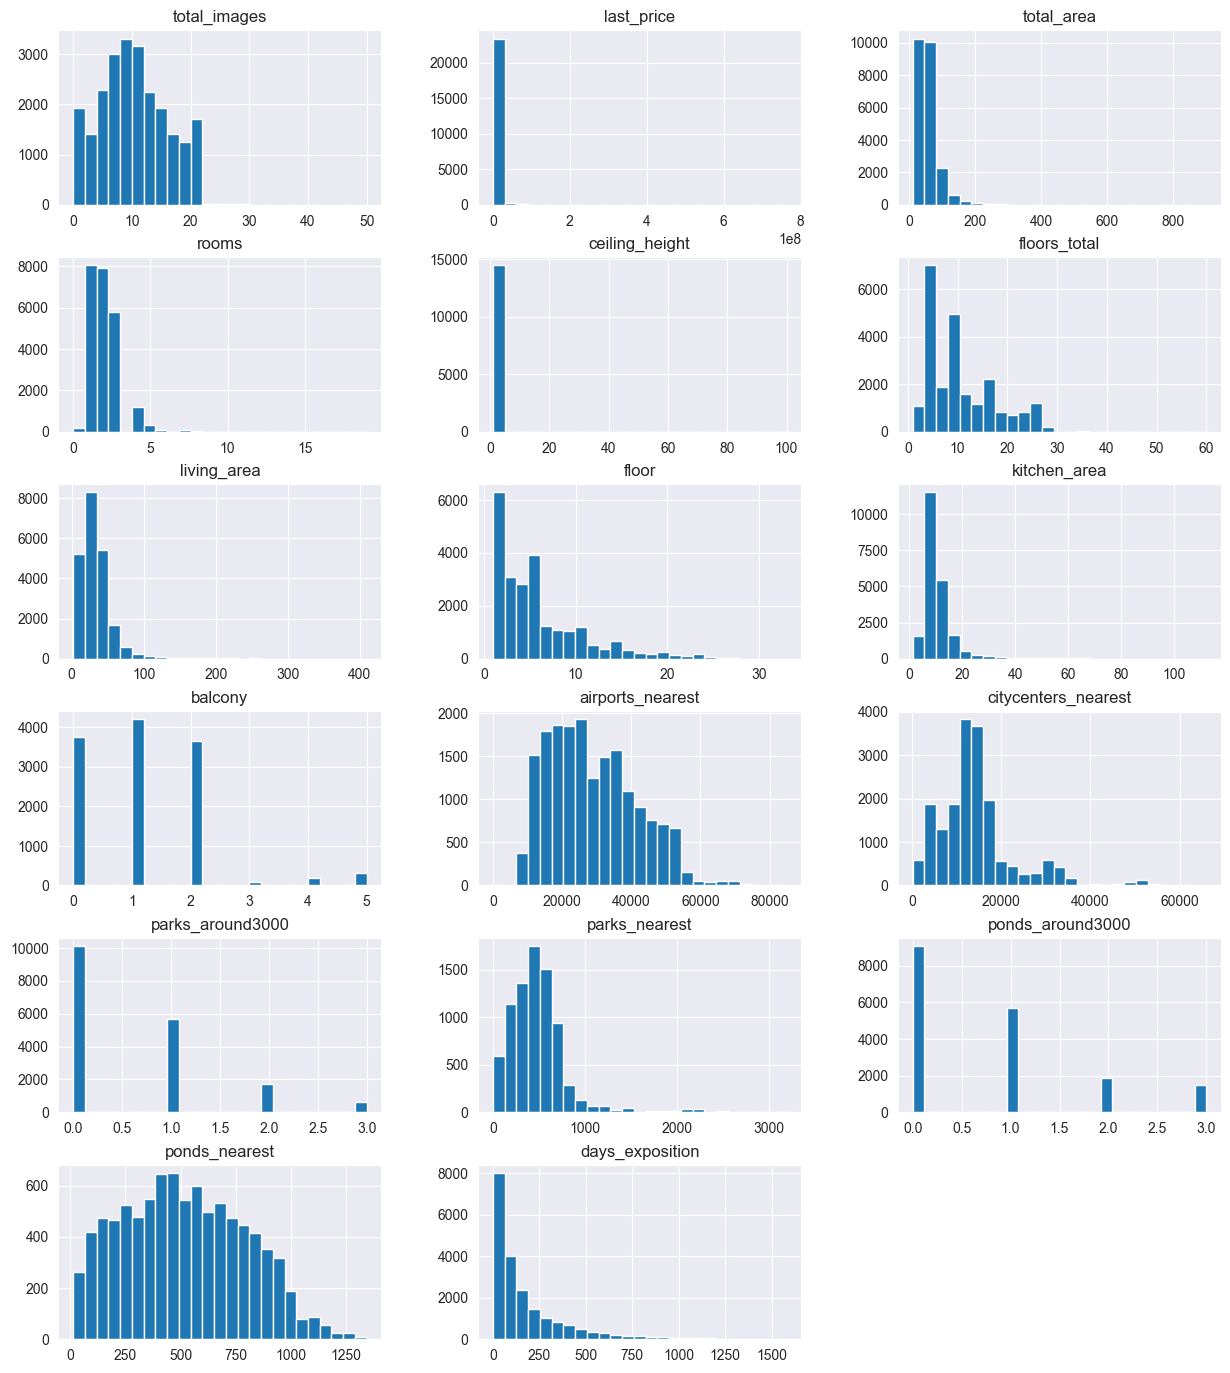

In [8]:
data.hist(figsize=(15, 17), layout=(6, 3), bins=25)
plt.show()

По гистограммам видно, что в большинстве столбцов присутствуют выбросы и во многих есть отсутствующие значений. Сведем всю информацию в один датафрейм. Посмотрим минимальные (`min`) и максимального значений (`max`) и сравним с присвоенным типом данных (`type`). Добавим столбец `float` с количеством значений с дробной частью. Для определения наличия дробной части напишем небольшую функцию. Процент количества пропущенных значений сохраним в столбце `nan_percent`

In [9]:
def bools(df):
    if df.dtypes in ["int64", "float64"]:
      return (df%1 > 0).sum()

In [10]:
def analyze(df):
    analyzed_data = (df.agg(["min", "max"]).transpose(copy=True))
    analyzed_data["type"] = df.dtypes
    analyzed_data["float"] = df.apply(bools)
    analyzed_data["nan_percent"] = round((df.isna().sum() / len(df) *100), 2)
    return analyzed_data

In [11]:
analyze(data)

,min,max,type,float,nan_percent
total_images,0,50,int64,0.0,0.00
last_price,12190.0,763000000.0,float64,0.0,0.00
total_area,12.0,900.0,float64,11249.0,0.00
first_day_exposition,2014-11-27T00:00:00,2019-05-03T00:00:00,object,NaN,0.00
rooms,0,19,int64,0.0,0.00
ceiling_height,1.0,100.0,float64,13314.0,38.80
floors_total,1.0,60.0,float64,0.0,0.36
living_area,2.0,409.7,float64,10978.0,8.03
floor,1,33,int64,0.0,0.00
is_apartment,False,True,object,NaN,88.29


Не все столбцы соответствуют своему текущему типу по количеству используемой памяти. Столбец `is_apartment` содержит более 80 процентов пропусков и его можно сразу удалить, для этого создадим новый датасет, с которым и будем впоследствии совершать действия, для того чтобы была возможность сравнить датасеты до и после очистки данных



In [12]:
data_new = data.drop("is_apartment", axis=1)
data_new.shape, data.shape

((23699, 21), (23699, 22))

Так же проверим датафрейм на явные дубликаты

In [13]:
data_new.duplicated().sum()

0



---



## Подготовка данных

Перейдем к анализу по столбцам. Общая информация о столбцах соответствует предоставленной инфрмации из описания к заданию.


### total_image

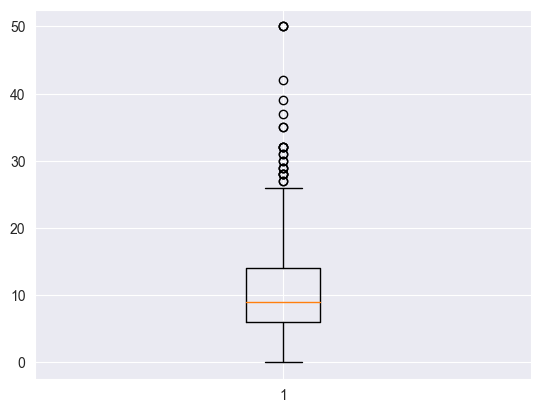

In [14]:
plt.boxplot(data_new.total_images)
plt.show()

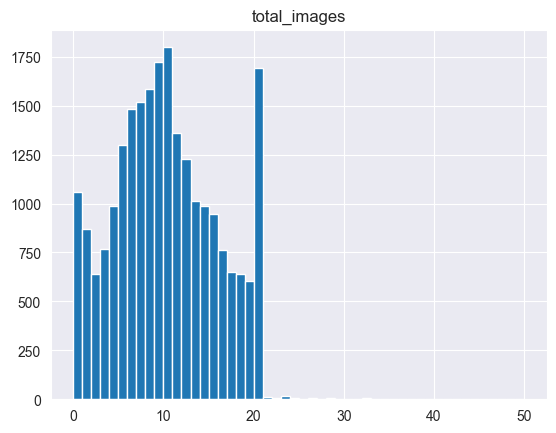

In [15]:
plt.hist(data_new.total_images, bins=50)
plt.title("total_images")
plt.show()

`total_images` — число фотографий квартиры в объявлении

Не имеет пропущенных значений и тип значений `int64` соответствует названию: количество фотографий не может быть дробным числом или отрицательным. По оценке данных тип `int64` можно сменить на менее затратный в плане памяти тип. На графиках заметны вбросы, но они не окажат значительного влияния на дальнейший анализ данных

In [16]:
data_new = data_new.astype(dtype={"total_images":"uint8"})



---



### last_price

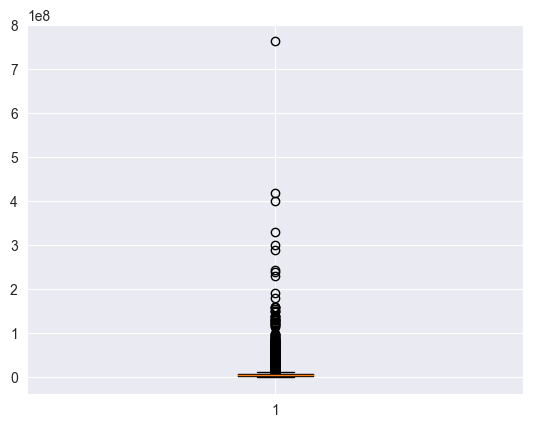

In [17]:
plt.boxplot(data_new.last_price)
plt.show()

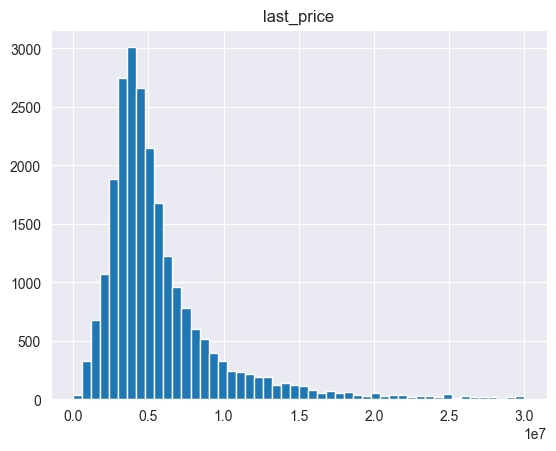

In [18]:
plt.hist(data_new.last_price, bins=50, range=(0, 3*10**7))
plt.title("last_price")
plt.show()

`last_price` — цена на момент снятия с публикации

Не имеет пропущенных значений, имеет тип `float`, что не характерно для цены. Конвертируем в целочисленный тип, занимающий наименьшее количество памяти относительно значений в столбце. Очень много выбросов на графиках. Необходимо удалить или заменить значения. Так как цена - один из основополагающих критериев, то корректировать эти значения будет неверным решением.

In [19]:
data_new = data_new.astype(dtype={"last_price":"uint32"})

In [20]:
z_1 = stats.zscore(data_new.last_price)
data_new = data_new.query("@z_1 < 3")

In [21]:
data.shape, data_new.shape

((23699, 22), (23496, 21))



---



### total_area

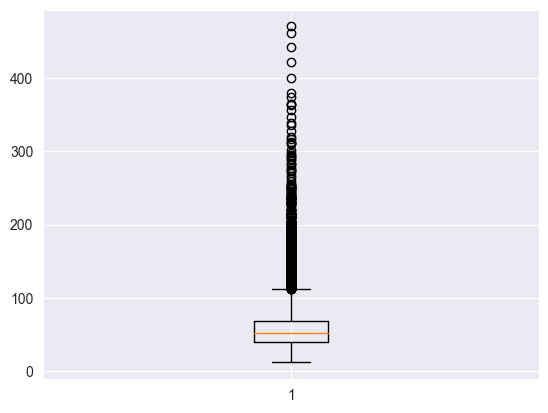

In [22]:
plt.boxplot(data_new.total_area)
plt.show()

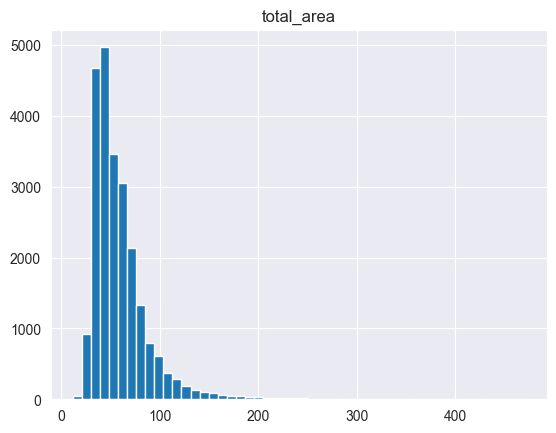

In [23]:
plt.hist(data_new.total_area, bins=50)
plt.title("total_area")
plt.show()

`total_area`  — общая площадь квартиры в квадратных метрах (м²) 

Не имеет пропущенных значений, имеет тип `float64`, что вполне допустимо по фактическому размеру квартиры, но в объявления используются целочисленный тип значений площади. Округлим значения в столбце до целочисленных и конвертируем в более подходящий тип. На графиках присутствуют достаточно большие выбросы, которые необходимо удалить, причина аналогична `last_price`.

In [24]:
data_new.total_area = round(data_new["total_area"])

In [25]:
data_new["total_area"] = pd.to_numeric(data_new["total_area"], downcast="unsigned")

In [26]:
z_2 = stats.zscore(data.total_area)
data_new = data_new.query("@z_2 < 6")

<AxesSubplot:>

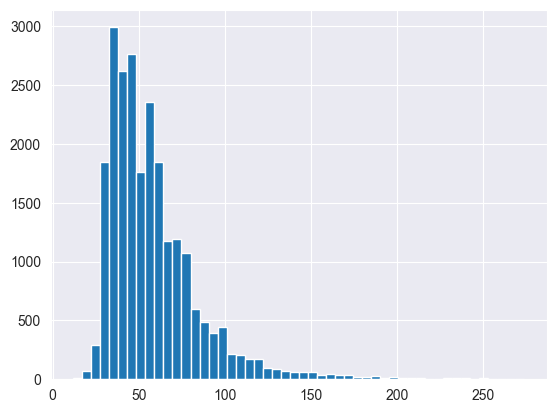

In [27]:
data_new["total_area"].hist(bins=50)

In [28]:
data.shape, data_new.shape

((23699, 22), (23463, 21))



---



### first_day_exposition

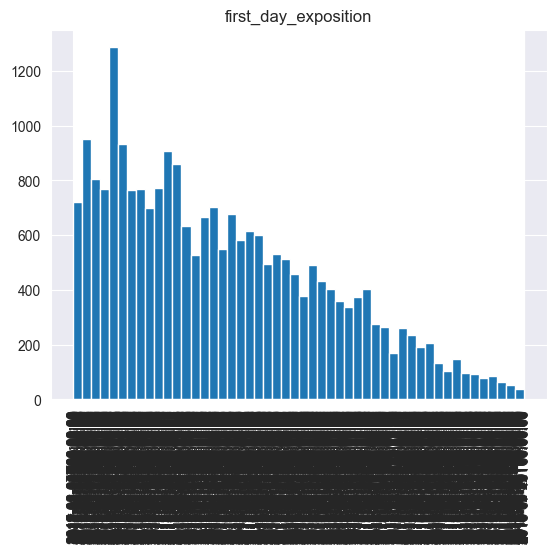

In [29]:
plt.hist(data_new.first_day_exposition, bins=50)
plt.xticks(rotation = 90)
plt.title("first_day_exposition")
plt.show()

In [30]:
analyze(data)["first_day_exposition":]

,min,max,type,float,nan_percent
first_day_exposition,2014-11-27T00:00:00,2019-05-03T00:00:00,object,NaN,0.00
rooms,0,19,int64,0.0,0.00
ceiling_height,1.0,100.0,float64,13314.0,38.80
floors_total,1.0,60.0,float64,0.0,0.36
living_area,2.0,409.7,float64,10978.0,8.03
floor,1,33,int64,0.0,0.00
is_apartment,False,True,object,NaN,88.29
studio,False,True,bool,NaN,0.00
open_plan,False,True,bool,NaN,0.00
kitchen_area,1.3,112.0,float64,11498.0,9.61


`first_day_exposition` — дата публикации

Не имеет пропущенных значений, тип `object`, что не соответствует данным. Судя по крайним значениям, отсутствует указание часов, минут и секунд

In [31]:
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'])



---



### rooms

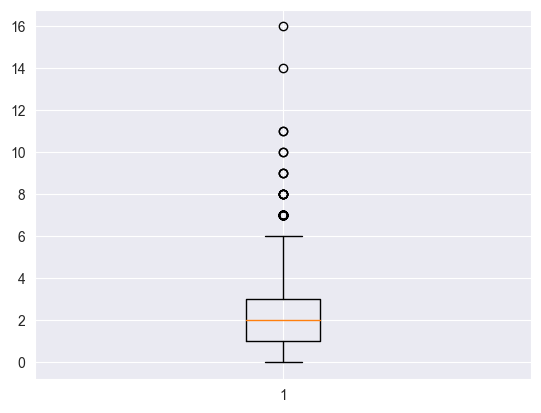

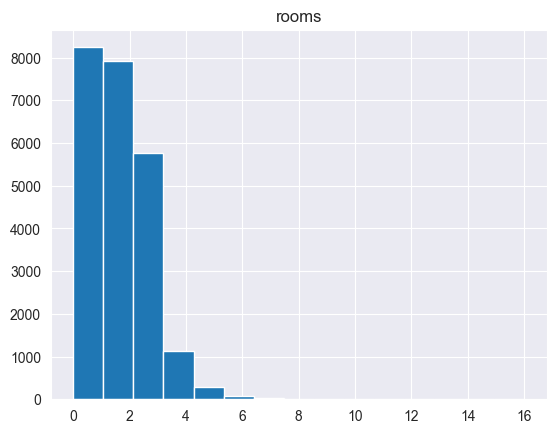

In [32]:
plt.boxplot(data_new.rooms)
data_new.hist("rooms", bins=15)
plt.show()

`rooms` - число комнат 

Не имеет пропущенных значений, тип `int64` соответствует содеражнию. Но более подходящий здесь - `category`. На графика присутствуют выбросы, которые необходимо удалить и аномальные значения равные 0. Выбросы будет определять как значения с количеством комнат больше 10, потому что это единичные значения, которые будут сказываться в дальнейшем на анализе. Предположение: 0 количество комнат связано с тем, что комната является студией

In [33]:
data_new = data_new.query("rooms <= 10")

In [34]:
data_new.rooms = data_new.rooms.astype("category")

In [35]:
pd.crosstab(data_new["rooms"], data_new["studio"])

studio,False,True
rooms,,
0,58,138
1,8033,11
2,7927,0
3,5756,0
4,1128,0
5,279,0
6,80,0
7,37,0
8,7,0


Действительно, из 196 квартир c 0 комнат - 138 являются студиями. Выявилась еще одна аномалия: студии присутствуют в категории однокомнатных квартир.  Необходимо это исправить.

In [36]:
data_new.loc[(data_new.studio == 1)&(data_new.rooms == 1), "rooms"] = 0

Теперь посмотрим на оставшиеся 56 строк (отсеем студии) и отсортируем получившиеся значения по убыванию жилой площади

In [37]:
data_new.loc[:, "total_area":"balcony"].query("rooms == 0 & studio == 0").sort_values("living_area", ascending = False)

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony
7237,43,2017-11-27,0,NaN,16.0,25.7,2,False,True,NaN,2.0
7008,32,2017-09-14,0,NaN,11.0,25.5,4,False,True,NaN,NaN
12412,27,2017-08-15,0,NaN,25.0,25.0,22,False,True,NaN,NaN
10606,25,2017-11-17,0,NaN,25.0,25.0,11,False,True,NaN,1.0
9861,25,2017-12-03,0,NaN,22.0,25.0,17,False,True,NaN,2.0
508,34,2017-03-28,0,NaN,26.0,24.3,19,False,True,NaN,1.0
12691,24,2017-11-10,0,NaN,19.0,24.2,13,False,True,NaN,1.0
21628,34,2017-03-18,0,NaN,20.0,24.0,10,False,True,NaN,2.0
4683,35,2018-02-01,0,NaN,25.0,23.4,25,False,True,NaN,NaN
17729,28,2017-12-09,0,NaN,14.0,21.8,9,False,True,NaN,2.0


Обратим внимание на два столбца `living_area` и `open_plan`. Небольшая жилая площадь позволяет предположить, что это либо студии, либо однокомнатные квартиры. Так же видно, что у всей выборки - свободная планировка. Свободная планировка вполне может предполагать студию. Проверим предположение, что квартиры со свободно планировкой чаще всего являются студиями.

In [38]:
pd.crosstab(data_new.open_plan, data_new.studio)

studio,False,True
open_plan,,
False,23245,149
True,65,0


Предположение не подтвердилось: из 149 студий ни одна не имеет свободной планировки. Вероятнее всего, это однокомнатные квартиры. Проверим вторую гипотезу о том, что это однокомнатные квартиры основываясь на распределении значений жилой площади, в зависимости от количества комнат   

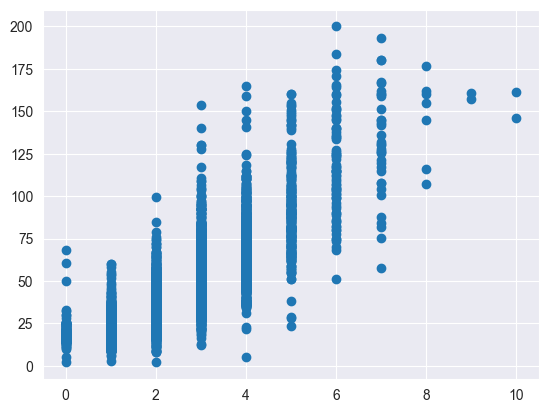

In [39]:
plt.scatter(data_new["rooms"], data_new["living_area"])
plt.show()

In [40]:
print(data.query("rooms == 0")["living_area"].describe())
data.query("rooms == 1")["living_area"].describe()

count    183.000000
mean      18.865246
std        6.549527
min        2.000000
25%       16.000000
50%       18.000000
75%       19.950000
max       68.000000
Name: living_area, dtype: float64


count    7388.000000
mean       17.893552
std         3.448422
min         3.000000
25%        16.000000
50%        17.600000
75%        19.000000
max        60.000000
Name: living_area, dtype: float64

График распределения не смог подтвердить гипотезу о том, что это однокомнатные квартиры, потому что выбросы значений жилой площади у студий(>50), смещают медиану и оказывается, что медиана жилого пространства студий больше, чем медиана однокомнатных квартир. Вернемся к первой гипотезе и остановимся на том, что студии не имеют свободной планировки, а значит выборка является однокомнатными квартирами

In [41]:
data_new.loc[(data_new.studio == 0)&(data_new.rooms == 0), "rooms"] = 1



---



### ceiling_height

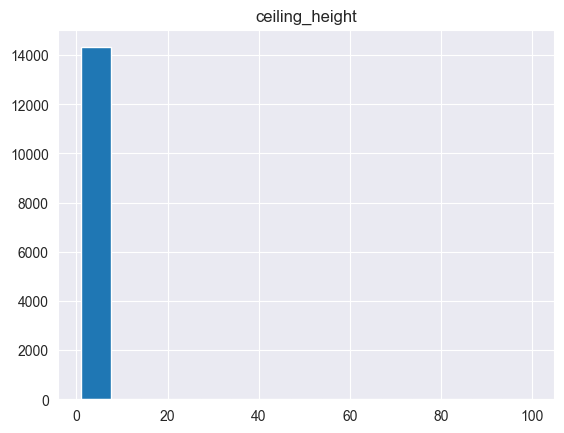

In [42]:
data_new.hist("ceiling_height", bins=15)
plt.show()

In [43]:
data_new.ceiling_height.describe()

count    14348.000000
mean         2.764764
std          1.264967
min          1.000000
25%          2.507500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

`ceiling_height` - высота потолков (м)

Имеет пропущенные значения, тип float64, что соответствует реальности, можно сменить на менее затратный в плане памяти тип. Количество знаков после запятой 2, что не является корретным. Максимальное и минимальное значения не соответствует реальности. Для ее иследования рассмотрим статистическую информацию о столбце. Для заполнения пропусков количественных переменных используются медиана и среднее арифметическое. Из-за наличия аномалий в значениях предварительно исследуем минимальные и максимальные значения. В соответствии со СНиПами - минимальная высота потолка для жилых помещений составляет 2,5 метров(т.к. в задании было указано, что это база продажи квартир, то воспользуемся именно этим значением). Максимально значение примем как ~7 метров исходя из формулы `Q3 + (1.5 * IQR)`, что вполне соответствует некоторым предложениям на рынке недвижимости на данный момент

In [44]:
data_new["ceiling_height"] = pd.to_numeric(data_new["ceiling_height"], downcast="float")

In [45]:
data_new["ceiling_height"] = data_new["ceiling_height"].round(1)

In [46]:
data_new.query("2.5 < ceiling_height < 7")["ceiling_height"].describe()

count    10469.000000
mean         2.807107
std          0.265446
min          2.600000
25%          2.600000
50%          2.700000
75%          2.900000
max          5.800000
Name: ceiling_height, dtype: float64

Количество корректых значений чуть меньше половины от датасета - достаточного большая выборка, чтобы выспользоваться ее медианным значением для заполнения пропусков

In [47]:
data_new["ceiling_height"] = data_new.ceiling_height.fillna(2.7) 
data_new.ceiling_height.isna().sum()

0

Двухзначную высоту потолков разделим на 10 - вероятнее всего ошибка ввода данных. Значениям с недопустимой минимальной высотой и с высотой более 7 метров заполним медианным значением как превалирующим

In [48]:
data_new.loc[data_new.ceiling_height >= 10, "ceiling_height"] = data_new.loc[data_new.ceiling_height >= 10, "ceiling_height"] / 10
data_new.ceiling_height.describe()

count    23459.000000
mean         2.715382
std          0.225685
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [49]:
data_new.loc[(data_new.ceiling_height < 2.5)|(data_new.ceiling_height > 7), "ceiling_height"] = 2.7

<AxesSubplot:>

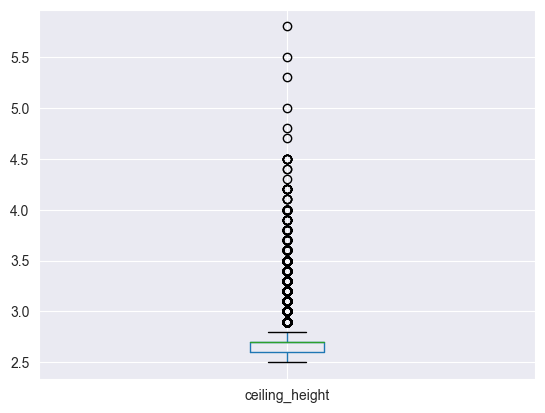

In [50]:
data_new.boxplot("ceiling_height")



---



### floors_total

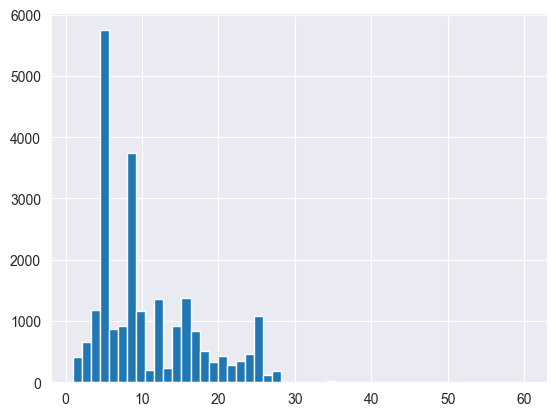

In [51]:
data_new.floors_total.hist(bins=50)
plt.show()

In [52]:
data_new.groupby("floors_total")["floor"].count()

floors_total
1.0       25
2.0      380
3.0      655
4.0     1176
5.0     5746
6.0      875
7.0      564
8.0      351
9.0     3743
10.0    1166
11.0     200
12.0    1355
13.0     227
14.0     551
15.0     365
16.0    1373
17.0     831
18.0     504
19.0     339
20.0     267
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1074
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floor, dtype: int64

`floors_total` — всего этажей в доме

Имеются пропущенные значения, тип данных не соответствует значениям. Минимальное значение в порядке, максимальное значение превышает допустимые регламенты высоты зданий в городе Санкт-Петербург: самое высокое жилое здание состоит из 32 этажей, но так как это тренировочный датасет - данные не будут корректироваться. Сменим тип данных и проанализируем распределение этажей в пропущенных значениях. 

In [53]:
data_new[data_new.floors_total.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65,2018-10-02,2,2.7,NaN,30.80,4,False,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28,2016-11-23,1,2.7,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,71,2015-08-01,2,2.7,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,94,2017-04-06,3,2.7,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39,2017-04-22,1,2.7,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,64,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64,2017-04-02,2,2.7,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110,2016-11-20,3,2.7,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123,2017-04-25,3,2.7,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


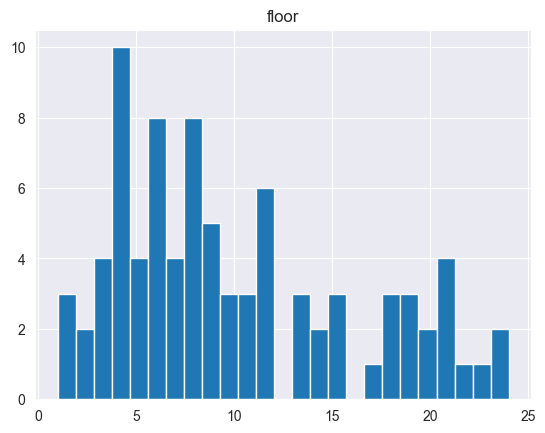

In [54]:
data_new[data_new.floors_total.isna()].hist("floor", bins=25)
plt.show()

Какой-либо закономерности не наблюдается. Заполним пропуски типичными значениями. Наиболее распространенная в России этажность зданий: 3, 4, 5, 9, 12, 16, 21, 27. Создадим функцию, которая распределит пропуски в соответствии с выбранными этажами.

In [55]:
data_new["floors_total"].dtypes

dtype('float64')

In [56]:
data_new.loc[(data_new.floors_total.isna())&(data_new.floor <= 3), "floors_total"]

237     NaN
3817    NaN
4140    NaN
9979    NaN
10880   NaN
15989   NaN
16668   NaN
20250   NaN
22542   NaN
Name: floors_total, dtype: float64

In [57]:
for i in [3, 4, 5, 9, 12, 16, 21, 27]:
  #print(data_new.loc[(data_new.floors_total.isna())&(data_new.floor < i), "floors_total"])
  data_new.loc[(data_new.floors_total.isna())&(data_new.floor < i), "floors_total"] = i

In [58]:
data_new["floors_total"] = pd.to_numeric(data_new["floors_total"], downcast="integer")
# data_new['floors_total'] = data_new['floors_total'].astype('int')
data_new["floors_total"].dtype

dtype('int8')



---



### living_area

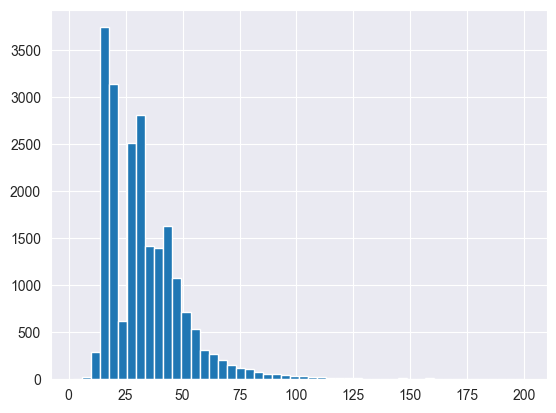

In [59]:
data_new.living_area.hist(bins=50)
plt.show()

`living_area` — жилая площадь в квадратных метрах (м²)

Имеются пропущенные значения, тип данных соответствует(можно изменить разрядность), минимальное значение аномально, максимально приемлимо. 

In [60]:
data_new["living_area"] = pd.to_numeric(data_new["living_area"], downcast="float")
data_new["living_area"] = data_new["living_area"].round()
data_new["living_area"]

0        51.0
1        19.0
2        34.0
4        32.0
5        14.0
         ... 
23694    73.0
23695    38.0
23696    30.0
23697     NaN
23698    12.0
Name: living_area, Length: 23459, dtype: float32

Оценим аномальные минимальные значения: общая площадь меньше суммы жилой и кухонной больше, чем в два раза или же сумма жилой площади и кухни больше или равна общей.

В первом случаей невозможно строить какие-либо обснованные предположения о том, по какой причине коридор, балкон и уборная занимают больше пространства, чем жилые помещения. 

Второй случай является несоответствием реальной жизни. Помимо кухни (где, нампомню, есть пропуски в данных, что говорит о том, что в сумму площадей кухни и жилой входит только жилая) и жилого пространства, существует, как минимум, уборная и ванная комната

In [61]:
living = data_new[(((data_new["living_area"]+data_new["kitchen_area"]) / data_new["total_area"]) < 0.5)|
         ((data_new["living_area"]+data_new["kitchen_area"])>= data_new["total_area"])].copy()
living["total_area"].count()

200

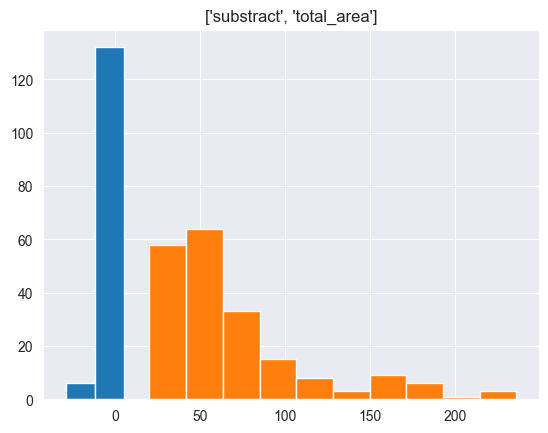

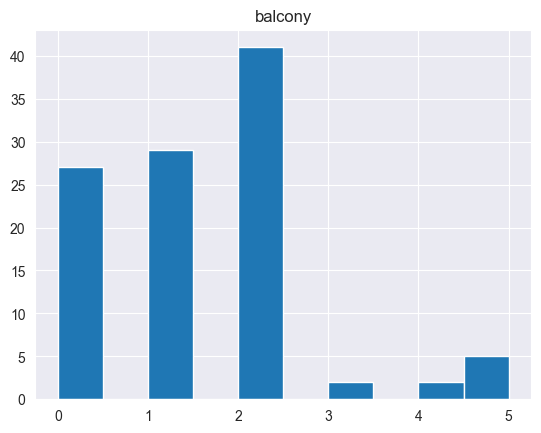

In [62]:
living["substract"] = living["total_area"] - living["living_area"] - living["kitchen_area"]
living["substract"].hist()
living["total_area"].hist()
plt.title(["substract", "total_area"])
plt.show()
living["balcony"].hist()
plt.title("balcony")
plt.show()

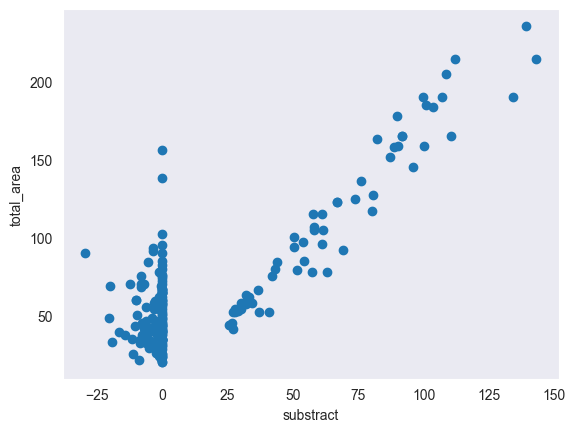

In [63]:
plt.scatter(living["substract"], living["total_area"])
plt.grid()
plt.xlabel("substract")
plt.ylabel("total_area")
plt.show()

Общая жилая площадь это сумма площадей кухни, уборной, коридора, балкона/лоджии и жилого пространства. Исходя из графиков, можно сказать что в данной выборке указанны аномальные значения, которые не представляется возможным как-либо скорректировать, потому что причины аномалий не понятны. Поэтому эти строки необходимо удалить 

In [64]:
data_new.shape, living.shape

((23459, 21), (200, 22))

In [65]:
data_new.drop(living.index, inplace=True)

In [66]:
data_new.shape

(23259, 21)

Заполнить пропуски значениями разницы между общей площадью и балкон+кухня - некорректно, при таких вычислениях на туалет и ванную не останется метража. Для заполнения пропусков посмотрим распределение зависимости общей площади от жилой и при стабильном распределении - заполним пропуски медианными значениями по каждой группе на основе значений жилой площади

In [67]:
# def fill_median(df, column_1, column_2)

In [68]:
group = data_new[["living_area", "total_area"]].groupby("total_area")
keys = group.groups.keys()
for i in keys:
    (data_new
     .loc[group
          .get_group(i)
          .index, "living_area"]) = (data_new
                                     .loc[group.get_group(i)
                                     .index, "living_area"]
                                     .fillna(data_new
                                             .loc[group.get_group(i)
                                             .index, "living_area"]
                                             .median().round(1)))
data_new.reset_index(inplace=True, drop=True)
data_new['living_area'].isna().sum()

C:\Anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


4

Оставшиеся пропуски удалим, чтобы они не вносили ошибок при дальнейшей обработке. Метод dropna не срабатывает, поэтому применим обычный drop

In [69]:
data_new.shape

(23259, 21)

In [70]:
data_new = data_new.drop(data_new[data_new['living_area'].isna()].index)
#data_new.reset_index(drop=True, inplace=True)
data_new.living_area.isna().sum()

0

In [71]:
data_new.shape

(23255, 21)



---



### floor

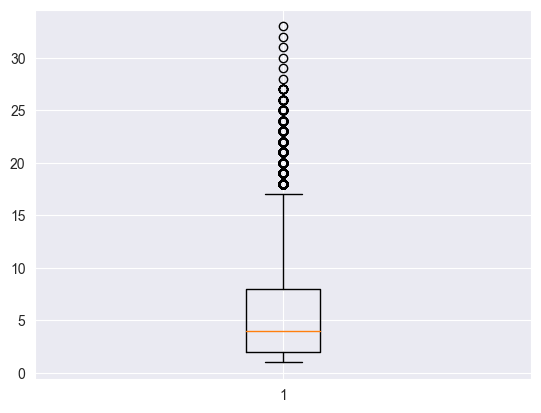

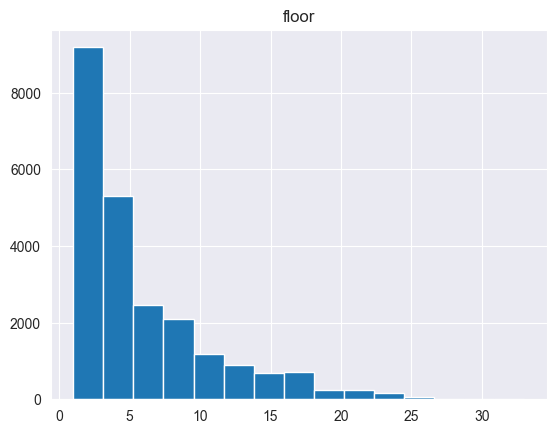

In [72]:
plt.boxplot(data_new.floor)
data_new.hist("floor", bins=15)
plt.show()

`floor` — этаж

Не имеет пропущенных значений и тип значений `int64` соответствует названию: количество этажей не может быть дробным числом или отрицательным. По оценке данных тип `int64` можно сменить на менее затратный в плане памяти тип. На графиках увидеть вбросы, но они являются индикатором новизны здания(высотки начали строить не так давно). Посмотрим распределение этажа квартиры от этажности дома

In [73]:
data_new = data_new.astype(dtype={"floor":"int8"})

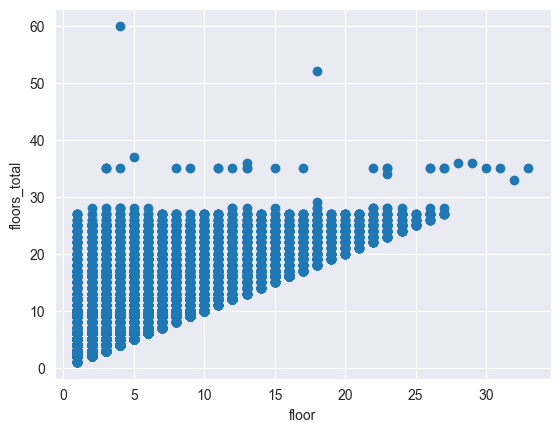

In [74]:
plt.scatter(data_new.floor, data_new.floors_total)
plt.xlabel("floor")
plt.ylabel("floors_total")
plt.show()

Есть некоторые вбросы, которые остались после анализа столбца `floors_total`, начиная с 30-ти этажных домов. Видная явная зависимость этажа квартиры от этажности: чем выше дом, тем выше этаж, на котором продается квартира.

In [75]:
data_new.shape

(23255, 21)



---



### studio

In [76]:
analyze(data)["studio":"open_plan"]

,min,max,type,float,nan_percent
studio,False,True,bool,NaN,0.0
open_plan,False,True,bool,NaN,0.0


`studio` — квартира-студия (булев тип)

Не имеет пропущенных значений и тип значений `bool` соответствует названию. При анализе количества комнат так же затрагивался и этот столбец. Посмотрим еще раз распрделение студий в зависимости от количества комнат

In [77]:
pd.crosstab(data_new["rooms"], data_new["studio"])

studio,False,True
rooms,,
0,0,149
1,8016,0
2,7861,0
3,5708,0
4,1118,0
5,275,0
6,80,0
7,36,0
8,7,0




---



### open_plan

In [78]:
analyze(data)["studio":"balcony"]

,min,max,type,float,nan_percent
studio,False,True,bool,NaN,0.00
open_plan,False,True,bool,NaN,0.00
kitchen_area,1.3,112.0,float64,11498.0,9.61
balcony,0.0,5.0,float64,0.0,48.61


`open_plan` — свободная планировка (булев тип)

Не имеет пропущенных значений и тип значений bool соответствует названию. 



---



### kitchen_area

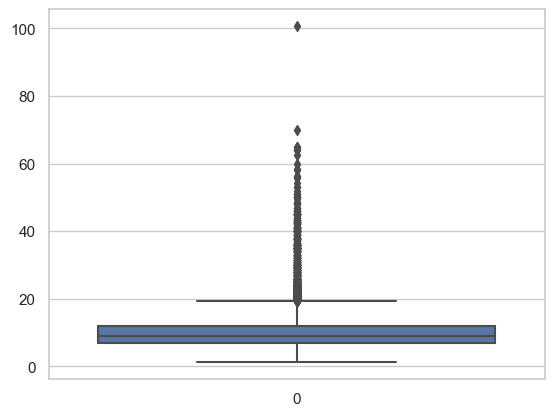

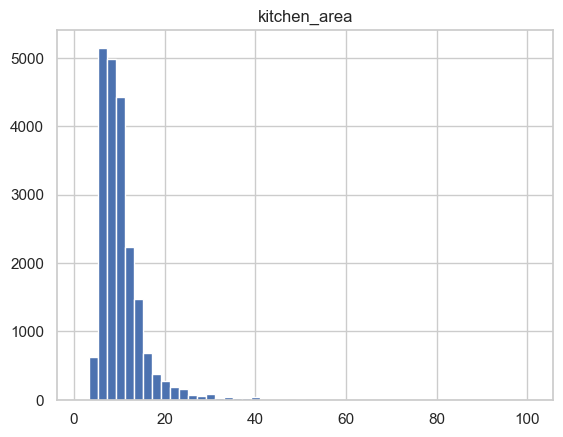

In [79]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=data_new.kitchen_area)
data_new.hist("kitchen_area", bins=50)
plt.show()

`kitchen_area` — площадь кухни в квадратных метрах (м²)

Имеются пропущенные значения, тип данных соответствует(можно изменить разрядность), минимальное и максимальное значения аномальны. Для определения аномалии необходимо рассмотреть графики зависимости от общей и жилой площадей

In [80]:
data_new["kitchen_area"] = pd.to_numeric(data_new["kitchen_area"], downcast="float")
data_new["kitchen_area"] = data_new["kitchen_area"].round()
data_new["kitchen_area"]

0        25.0
1        11.0
2         8.0
3        41.0
4         9.0
         ... 
23254    14.0
23255     8.0
23256     NaN
23257    23.0
23258     9.0
Name: kitchen_area, Length: 23255, dtype: float32

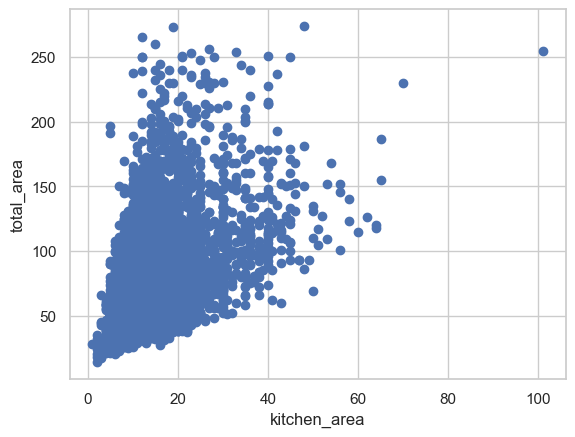

In [81]:
plt.scatter(data_new["kitchen_area"], data_new["total_area"])
plt.xlabel("kitchen_area")
plt.ylabel("total_area")
plt.show()

In [82]:
data_new.loc[data_new["kitchen_area"] >= 80]["kitchen_area"].count()

1

Удалим явные вбросы - более 80 кв.м. Скорее всего здесь кухня является частью жилого пространства и указанное значение - не релевантно. Рассмотрим значения кухонь менее 6 квадратов(минималная допустимая площадь кухонь) в зависимости от количества комнат и общей площади

In [83]:
data_new.shape

(23255, 21)

In [84]:
data_new.loc[data_new["kitchen_area"] >= 80]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2435,9,12500000,255,2017-04-21,3,2.7,2,154.0,2,False,...,101.0,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0


In [85]:
data_new = data_new.drop((data_new.loc[data_new["kitchen_area"] >= 80]).index)

In [86]:
data_new.shape

(23254, 21)

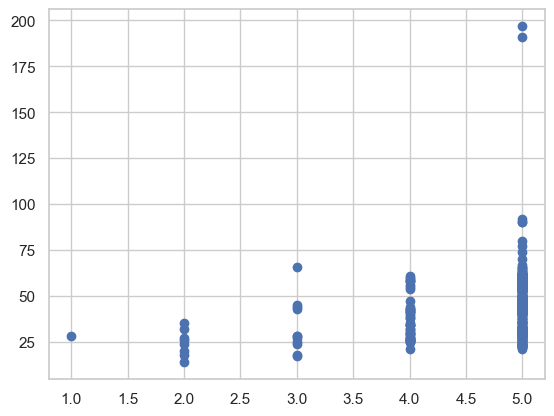

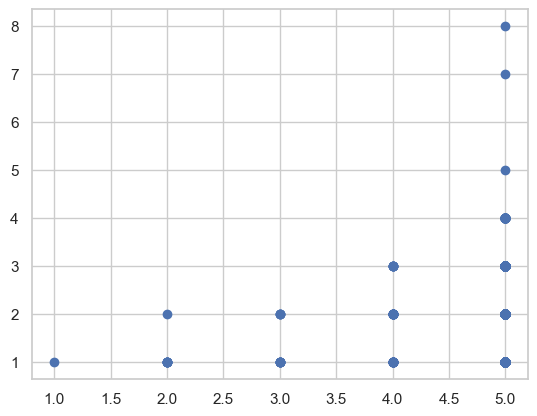

In [87]:
plt.scatter(data_new[data_new["kitchen_area"] < 6]["kitchen_area"], 
            data_new[data_new["kitchen_area"] < 6]["total_area"])
plt.show()
plt.scatter(data_new[data_new["kitchen_area"] < 6]["kitchen_area"], 
            data_new[data_new["kitchen_area"] < 6]["rooms"])

In [88]:
data_new.shape

(23254, 21)

Проверим свободную планировку - возможно, это верный размер кухонь, которые совместили с комнатами, прихожими, коридорами

In [89]:
data_new[data_new["kitchen_area"] < 6]["open_plan"].sum()

0

Так как предположение не подтвердилось и вычислить значение площади не получится без значений площади уборных и ванных комнат, то распределим значения так: однокомнатные квартиры до 25 квадратов отнесем к студиям (возможно были неузаконенные перепланировки и квартира считается однокомнатной, поэтому значение в столбце `studio` - `False`), остальные выбросы заменим минимальным возможным значением = 6.

Квартиры до 25 кв.м., кухонной зоной меньше 6 кв.м. и количеством комнат 1 теперь будут студиями

In [90]:
data_new.loc[(data_new["kitchen_area"] < 6)&
             (data_new["total_area"] <= 25)&
             (data_new["rooms"] == 1), "studio"] = True

Студиями с количеством комнат 0

In [91]:
data_new.loc[(data_new["kitchen_area"] < 6)&
             (data_new["total_area"] <= 25)&
             (data_new["rooms"] == 1), "rooms"] = 0

In [92]:
data_new.loc[(data_new["kitchen_area"] < 6)&
             (data_new["total_area"] <= 25)&
             (data_new["rooms"] != 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6150,9,3100000,24,2018-06-25,2,3.0,5,16.0,5,False,...,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0


После проверки осталось одно выпадающее значение, удалим его 

In [93]:
data_new.shape

(23254, 21)

In [94]:
data_new.drop(data_new.loc[(data_new["kitchen_area"] < 6)&
             (data_new["total_area"] <= 25)&
             (data_new["rooms"] != 0)].index, inplace=True)
data_new.shape

(23253, 21)

In [95]:
data_new.loc[(data_new["kitchen_area"] < 6)&
             (data_new["total_area"] > 25)&
             (data_new["rooms"] != 0), "kitchen_area"] = 6
data_new.reset_index(inplace=True, drop=True)
data_new.shape


(23253, 21)

In [96]:
# kitchen = data_new.loc[(data_new["rooms"] != 0)&(data_new["kitchen_area"] < 6), ["kitchen_area", "total_area"]]
# group_1 = data_new[["kitchen_area", "total_area"]].groupby("total_area")
# keys_1 = group_1.groups.keys()
# #group_1.get_group(43).median()
# for i in kitchen["total_area"]:
#   print(kitchen.loc[kitchen["total_area"] == i, "kitchen_area"]) 
#   print(group_1.get_group(i).median())
# kitchen



---



### balcony

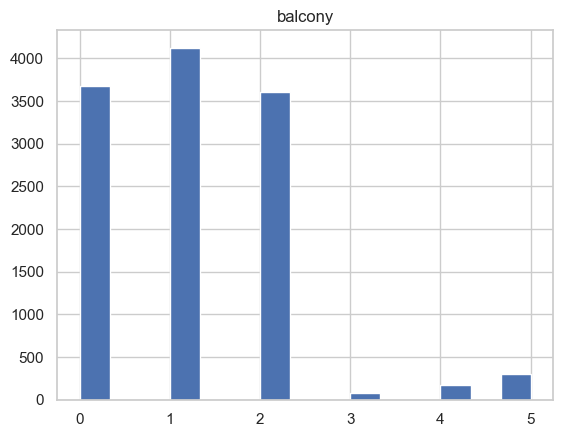

In [97]:
data_new.hist("balcony", bins=15)
plt.show()

In [98]:
analyze(data)["balcony":]

,min,max,type,float,nan_percent
balcony,0.0,5.0,float64,0.0,48.61
airports_nearest,0.0,84869.0,float64,0.0,23.38
citycenters_nearest,181.0,65968.0,float64,0.0,23.29
parks_around3000,0.0,3.0,float64,0.0,23.28
parks_nearest,1.0,3190.0,float64,0.0,65.91
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`balcony` — число балконов

Имеются пропущенные значения, тип значений не соответствует содержанию: количество балконов не может быть дробным числом или отрицательным. По оценке данных тип `int64` можно сменить на менее затратный в плане памяти тип. На графике видны аномальные значения 3, 4, 5, которые необходимо рассмотреть в разрезе общей площади квартиры

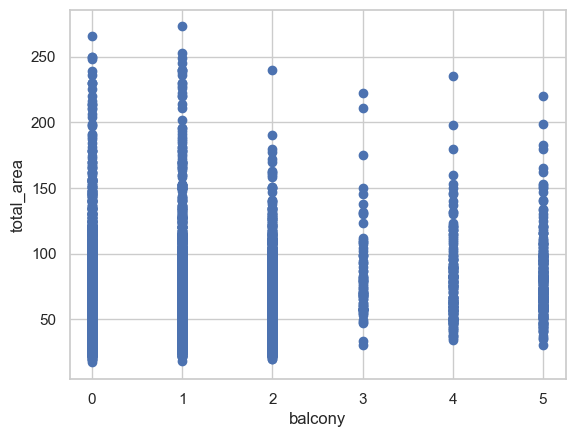

In [99]:
plt.scatter(data_new["balcony"], data_new["total_area"])
plt.xlabel("balcony")
plt.ylabel("total_area")
plt.show()

In [100]:
data_new.loc[(data_new.balcony >  2)&(data_new.total_area < 50), 
             "total_area":"balcony"].sort_values("total_area")

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony
8051,30,2018-10-22,1,2.5,5,17.0,5,False,False,6.0,3.0
7780,30,2016-11-09,1,2.5,9,15.0,2,False,False,8.0,5.0
17264,33,2017-11-10,1,2.7,5,18.0,4,False,False,6.0,3.0
16234,34,2018-07-03,1,2.8,5,17.0,5,False,False,NaN,4.0
13385,35,2018-09-21,1,2.7,16,15.0,14,False,False,9.0,5.0
11364,36,2018-08-28,1,2.6,22,17.0,19,False,False,10.0,5.0
637,36,2017-04-18,1,2.7,5,20.0,5,False,False,8.0,4.0
20498,37,2017-11-26,1,2.7,14,16.0,5,False,False,11.0,5.0
20489,37,2015-12-18,1,2.7,11,16.0,5,False,False,10.0,4.0
11223,37,2017-05-03,1,2.6,24,26.0,20,False,False,10.0,4.0


При площади квартиры менее 50 квадратов маловероятно наличие более 3-х балконов. Поэтому заменим эти значения на более стандартный вариант - 1 балкон

In [101]:
data_new.loc[(data_new.balcony >  2)&(data_new.total_area < 50), "balcony"] = 1

In [102]:
print(data_new.shape)
data_new.loc[(data_new.balcony >  2)&(data_new.total_area < 50), "balcony"]

(23253, 21)


Series([], Name: balcony, dtype: float64)

Теперь заполним пропуски. Наличие балкона зависит от общей площади, для совсем маленьких квартир-студий - 0 балконов, для квартир от 30 до 50 кв. м. - 1 балкон, для остальных - 2 балкона. Наличие более двух балконов, как видно по гистограмме распределения, очень редкое явление

In [103]:
for i, j in [[30, 0], [50, 1], [data_new.total_area.max(), 2]]:
  data_new.loc[data_new["total_area"] <= i, "balcony"] = \
  data_new.loc[data_new["total_area"] <= i, "balcony"].fillna(j)
data_new.balcony.isna().sum()

0

In [104]:
data_new["balcony"] = pd.to_numeric(data_new["balcony"], downcast="unsigned")
data_new.balcony.dtypes

dtype('uint8')

In [105]:
data_new.shape

(23253, 21)



---



### locality_name

In [106]:
print(data_new.locality_name.dtype)
data_new.locality_name.isna().sum()

object


49

In [107]:
data_new.locality_name.nunique()

364

`locality_name` — название населённого пункта

Есть пропущенные значения, тип object соотетствует содержимому, явных дубликатов нет, при визуальном осмотре дубликатов так же не обнаружено. Заполним дубликаты с помощью столбцов `airports_nearest` и `citycenters_nearest`: столбцы с равными расстояниями, очевидно, будут иметь одинаковое местоположение. Перед заполнением дубликатов избавимся от строк с пропущенными значениями во всех вышеперечисленных столбцах

In [108]:
data_new.drop(data_new.loc[data_new.locality_name.isna()&
                           (data_new.airports_nearest.isna())&
                           (data_new.citycenters_nearest.isna())].index, 
               inplace=True)

Теперь заполним пропущенные значения. Создадим датафрейм `locality_na` с пропущенными значениями и отсортируем исходный датафрейм по содержанию значений из столбцов `airports_nearest` и `citycenters_nearest`. Далее отсортируем значения по удаленности аэропорта и заполним предыдущим значением и посмотрим количество уникальных значеий в столбце наименоований населенного пункта

In [109]:
locality_na = data_new.loc[data_new.locality_name.isna()]
data_new.query("airports_nearest in @locality_na.airports_nearest and \
                citycenters_nearest in @locality_na.citycenters_nearest")\
                .nunique()

total_images            20
last_price              81
total_area              52
first_day_exposition    71
rooms                    6
ceiling_height           9
floors_total            16
living_area             42
floor                   20
studio                   2
open_plan                2
kitchen_area            16
balcony                  4
locality_name            1
airports_nearest        31
citycenters_nearest     31
parks_around3000         4
parks_nearest           15
ponds_around3000         4
ponds_nearest           18
days_exposition         71
dtype: int64

In [110]:
data_new['locality_name'].fillna("Санкт-Петербург", inplace=True)

Необходима дополнительная проверка на наличие дубликатов. Для этого создадим дубликат столбца и удалим в нем пропущенные значения 

In [111]:
label = pd.Series(data_new.locality_name.copy())
label.sort_values()

2947             Бокситогорск
744              Бокситогорск
8465             Бокситогорск
1029             Бокситогорск
622              Бокситогорск
                 ...         
20857    село Русско-Высоцкое
13174    село Русско-Высоцкое
4587       село Старая Ладога
18816      село Старая Ладога
15159                село Шум
Name: locality_name, Length: 23245, dtype: object

Удалим в столбце слова с нижним регистром, обозначающие принадлежность к определенному виду населенного пункта, чтобы была возможность, впоследствии, группировать и оценивать данные по названию населенного пункта. Добавим столбец в датафрейм

In [112]:
label = label.apply(lambda s: ' '.join([x for x in s.split() if not x.islower()]))

In [113]:
data_new.insert(14, "label", label)

In [114]:
# s = ['поселок городского типа Красный Бор' , "поселок Шашары"]
# # s = [[x for x in s[i].split() if not x.islower()] for i in range(len(s))]
# for i in range(len(s)):
#   for j in s[i].split():
#     if not j.islower():
#       print("".join(j), end="\n")

In [115]:
print(data_new.label.nunique())
data_new[["locality_name", "label"]].head()

305


,locality_name,label
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,городской посёлок Янино-1,Янино-1




---



### airports_nearest

In [116]:
analyze(data)["airports_nearest":]

,min,max,type,float,nan_percent
airports_nearest,0.0,84869.0,float64,0.0,23.38
citycenters_nearest,181.0,65968.0,float64,0.0,23.29
parks_around3000,0.0,3.0,float64,0.0,23.28
parks_nearest,1.0,3190.0,float64,0.0,65.91
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


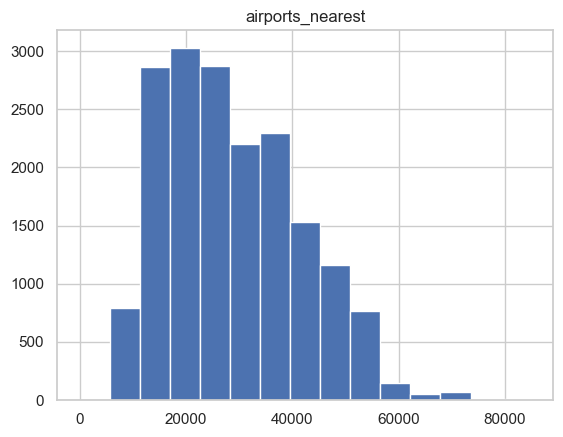

In [117]:
data_new.hist("airports_nearest", bins=15)
plt.show()

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

Присутствуют пропущеннные значения. Минимальное значение аномально(около нуля), максимальное значение соответствует реальности. Тип не соответствует, значения указаны целочисленные. Исходя из гистрограммы: есть небольшой выброс около 80000 м, но его удалять не будем, сильного искажения он не вносит.  Около 5000 м присутствует аномалия

Пропуски заполнять не будем, потому что данные будут искажены. Подсчитаем количество значений равных нулю. Если их небольшое количество, то удалим, потому что квартира, расположенная в аэропорту - абсурд

In [119]:
data_new.query("airports_nearest == 0")["airports_nearest"].count()

1

In [120]:
data_new.drop(data_new.query("airports_nearest == 0").index, inplace=True)

In [121]:
data_new["airports_nearest"] = data_new["airports_nearest"].astype("Int32")
data_new.airports_nearest.dtypes

Int32Dtype()



---



### citycenters_nearest

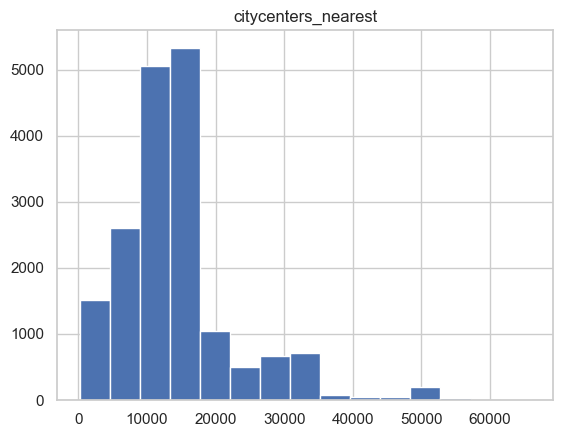

In [122]:
data_new.hist("citycenters_nearest", bins=15)
plt.show()

In [123]:
analyze(data)["citycenters_nearest":]

,min,max,type,float,nan_percent
citycenters_nearest,181.0,65968.0,float64,0.0,23.29
parks_around3000,0.0,3.0,float64,0.0,23.28
parks_nearest,1.0,3190.0,float64,0.0,65.91
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`citycenters_nearest` — расстояние до центра города (м)

Присутствуют пропущеннные значения. Минимальное значение аномально(около нуля), максимальное значение соответствует реальности. Тип не соответствует, значения указаны целочисленные. Исходя из гистрограммы: есть выбросы от 40000 м, но удалять не будем, сильного искажения не вносят. 

Пропущенные значения заполнять не будем, чтобы не вносить искажений в данные

In [124]:
data_new["citycenters_nearest"] = data_new["citycenters_nearest"].astype("Int32")
data_new.citycenters_nearest.dtypes

Int32Dtype()



---



### parks_around3000

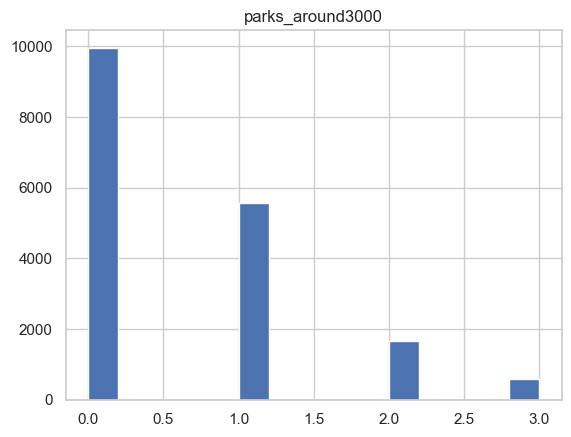

In [125]:
data_new.hist("parks_around3000", bins=15)
plt.show()

In [126]:
analyze(data)["parks_around3000":]

,min,max,type,float,nan_percent
parks_around3000,0.0,3.0,float64,0.0,23.28
parks_nearest,1.0,3190.0,float64,0.0,65.91
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`parks_around3000` — число парков в радиусе 3 км

Присутствуют пропущеннные значения. Минимальное и максимальное значения соответствует реальности. Тип не соответствует, количество целочисленное. Исходя из гистрограммы выбросов нет. 

Пропущенные значения заполнять не будем, чтобы не вносить искажений в данные

In [127]:
data_new["parks_around3000"] = data_new["parks_around3000"].astype("Int8")
data_new.parks_around3000.dtypes

Int8Dtype()



---



### parks_nearest

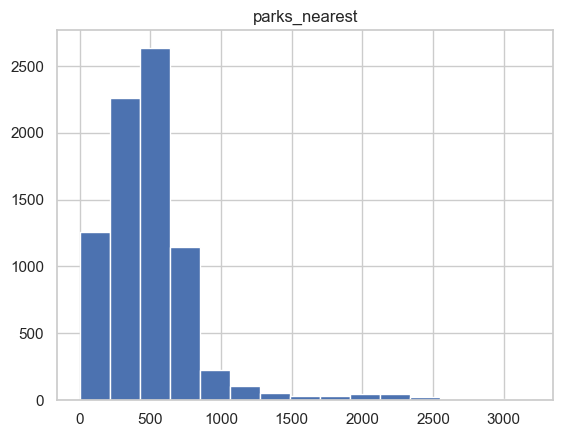

In [128]:
data_new.hist("parks_nearest", bins=15)
plt.show()

In [129]:
analyze(data)["parks_nearest":]

,min,max,type,float,nan_percent
parks_nearest,1.0,3190.0,float64,0.0,65.91
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`parks_nearest` — расстояние до ближайшего парка (м)

Присутствуют пропущеннные значения. Минимальное и максимальное значения соответствует реальности. Тип не соответствует, значения указаны целочисленные. Исходя из гистрограммы: есть выбросы от 1500 м, но удалять не будем, сильного искажения не вносят. 

Пропущенные значения заполнять не будем, чтобы не вносить искажений в данные

In [130]:
data_new["parks_nearest"] = data_new["parks_nearest"].astype("Int16")
data_new.parks_nearest.dtypes

Int16Dtype()



---



### ponds_around3000

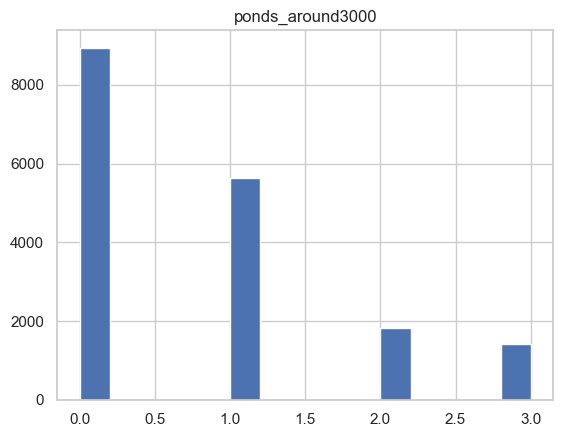

In [131]:
data_new.hist("ponds_around3000", bins=15)
plt.show()

In [132]:
analyze(data)["ponds_around3000":]

,min,max,type,float,nan_percent
ponds_around3000,0.0,3.0,float64,0.0,23.28
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`ponds_around3000` — число водоёмов в радиусе 3 км

Присутствуют пропущеннные значения. Минимальное и максимальное значения соответствует реальности. Тип не соответствует, количество целочисленное. Исходя из гистрограммы выбросов нет. 

Пропущенные значения заполнять не будем, чтобы не вносить искажений в данные

In [133]:
data_new["ponds_around3000"] = data_new["ponds_around3000"].astype("Int8")
data_new.ponds_around3000.dtypes

Int8Dtype()



---



### ponds_nearest

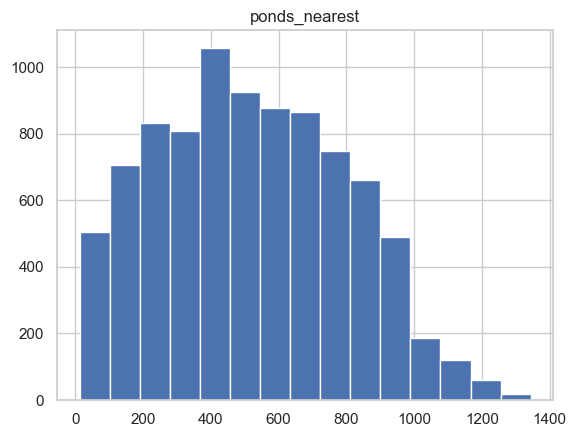

In [134]:
data_new.hist("ponds_nearest", bins=15)
plt.show()

In [135]:
analyze(data)["ponds_nearest":]

,min,max,type,float,nan_percent
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`ponds_nearest` — расстояние до ближайшего водоёма (м)

Присутствуют пропущеннные значения. Минимальное и максимальное значения соответствует реальности. Тип не соответствует, значения указаны целочисленные. Исходя из гистрограммы: вбросов нет 

Пропущенные значения заполнять не будем, чтобы не вносить искажений в данные

In [136]:
data_new["ponds_nearest"] = data_new["ponds_nearest"].astype("Int16")
data_new.citycenters_nearest.dtypes

Int32Dtype()



---



### days_exposition

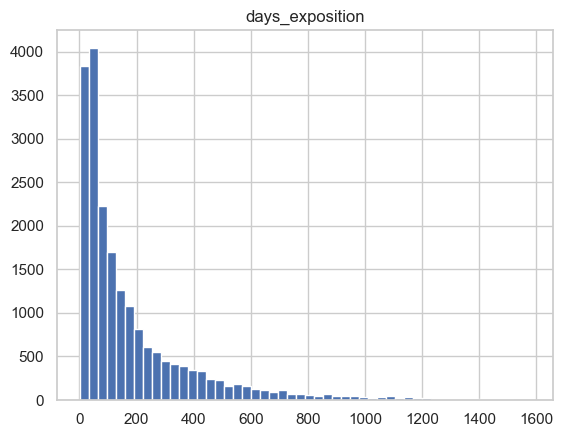

In [137]:
data_new.hist("days_exposition", bins=50)
plt.show()

In [138]:
analyze(data)["ponds_nearest":]

,min,max,type,float,nan_percent
ponds_nearest,13.0,1344.0,float64,0.0,61.56
days_exposition,1.0,1580.0,float64,3997.0,13.42


`days_exposition` - сколько дней было размещено объявление (от публикации до снятия)

Присутствуют пропущенные значения. Минимальное и максимальное значения соответствует реальности. Тип не соответствует, количество дней не может быть. Исходя из гистограммы есть вбросы, но вполне логичные - объявление могло висеть достаточно долго.

Для заполнения пропущенных значений проделаем те же операции, что и для столбца `airports_nearest`

In [139]:
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,label,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,False,...,2,Санкт-Петербург,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,2.7,11,19.0,1,False,...,2,посёлок Шушары,Шушары,12817,18603,0,<NA>,0,<NA>,81.0
2,10,5196000,56,2015-08-20,2,2.7,5,34.0,4,False,...,0,Санкт-Петербург,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,2,10000000,100,2018-06-19,2,3.0,14,32.0,13,False,...,2,Санкт-Петербург,Санкт-Петербург,31856,8098,2,112,1,48,121.0
4,10,2890000,30,2018-09-10,1,2.7,12,14.0,5,False,...,0,городской посёлок Янино-1,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,9,9700000,134,2017-03-21,3,3.7,5,73.0,3,False,...,2,Санкт-Петербург,Санкт-Петербург,24665,4232,1,796,3,381,NaN
23249,14,3100000,59,2018-01-15,3,2.7,5,38.0,4,False,...,2,Тосно,Тосно,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45.0
23250,18,2500000,57,2018-02-11,2,2.7,3,30.0,1,False,...,2,село Рождествено,Рождествено,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
23251,13,11475000,77,2017-03-28,2,3.0,17,45.0,12,False,...,2,Санкт-Петербург,Санкт-Петербург,39140,10364,2,173,3,196,602.0


In [140]:
data_new.days_exposition.isna().sum()

3098

Данный столбец в дальнейшем будет использован для исследовательского анализа, поэтому пропуски заполнять не будет, для исключения искажения данных

In [142]:
data_new["days_exposition"] = data_new["days_exposition"].round().astype("Int16")
data_new.days_exposition.dtypes

Int16Dtype()

In [143]:
data_new.reset_index(drop=True, inplace=True)

### Вывод по разделу

In [144]:
analyze(data)

,min,max,type,float,nan_percent
total_images,0,50,int64,0.0,0.00
last_price,12190.0,763000000.0,float64,0.0,0.00
total_area,12.0,900.0,float64,11249.0,0.00
first_day_exposition,2014-11-27T00:00:00,2019-05-03T00:00:00,object,NaN,0.00
rooms,0,19,int64,0.0,0.00
ceiling_height,1.0,100.0,float64,13314.0,38.80
floors_total,1.0,60.0,float64,0.0,0.36
living_area,2.0,409.7,float64,10978.0,8.03
floor,1,33,int64,0.0,0.00
is_apartment,False,True,object,NaN,88.29


*  Проведенный детальный анализ по столбца помог выявить аномальные значений в одном из основополагающих столбцов для последующего исследовательского анализа - `total_area`. Так же аномалии были выявлены и устранены в других столбцах:
`last_price`, `rooms`, `ceiling_height`, `living_area`, `studio`, `kitchen_area`, `balcony`. 

*  Для столбца `locality_name` были выявлены и устранены неявные дубликаты.  

*  Пропущенные значения были устранены в столбцах: `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`. Для столбцов `airports_nearest`, `citycenters_nearest`, `parks_around3000` `arks_nearest` `onds_around3000`, `ponds_nearest`, `days_exposition` корректно произввести замену/удаленние пропущенных значений не представляется возможным, поэтому столбцы оставлены без изменений. 

*  Столбец `is_apartment` был удален из датасета по причине слишком большого количества пропущенных значений (>80%). 

*  Для всех столбцов был изменен тип данных.

In [145]:
analyze(data_new)

,min,max,type,float,nan_percent
total_images,0,50,uint8,None,0.00
last_price,12190,39000000,uint32,None,0.00
total_area,12,274,uint16,None,0.00
first_day_exposition,2014-11-27 00:00:00,2019-05-03 00:00:00,datetime64[ns],None,0.00
ceiling_height,2.5,5.8,float32,None,0.00
floors_total,1,60,int8,None,0.00
living_area,2.0,200.0,float32,None,0.00
floor,1,33,int8,None,0.00
studio,False,True,bool,None,0.00
open_plan,False,True,bool,None,0.00




---



## Добавление новых данных

Цена одного квадратного метра;

In [146]:
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,label,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,False,...,2,Санкт-Петербург,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40,2018-12-04,1,2.7,11,19.0,1,False,...,2,посёлок Шушары,Шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56,2015-08-20,2,2.7,5,34.0,4,False,...,0,Санкт-Петербург,Санкт-Петербург,21741,13933,1,90,2,574,558
3,2,10000000,100,2018-06-19,2,3.0,14,32.0,13,False,...,2,Санкт-Петербург,Санкт-Петербург,31856,8098,2,112,1,48,121
4,10,2890000,30,2018-09-10,1,2.7,12,14.0,5,False,...,0,городской посёлок Янино-1,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23239,9,9700000,134,2017-03-21,3,3.7,5,73.0,3,False,...,2,Санкт-Петербург,Санкт-Петербург,24665,4232,1,796,3,381,<NA>
23240,14,3100000,59,2018-01-15,3,2.7,5,38.0,4,False,...,2,Тосно,Тосно,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45
23241,18,2500000,57,2018-02-11,2,2.7,3,30.0,1,False,...,2,село Рождествено,Рождествено,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
23242,13,11475000,77,2017-03-28,2,3.0,17,45.0,12,False,...,2,Санкт-Петербург,Санкт-Петербург,39140,10364,2,173,3,196,602


In [147]:
data_new.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'label', 'airports_nearest', 'citycenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

In [148]:
data_fin = data_new[['last_price', 'total_area', 'living_area', 'kitchen_area', 
                    'rooms', 'ceiling_height', 
                    'floors_total', 'floor', 'label', 
                    'airports_nearest', 'citycenters_nearest', 'parks_nearest', 
                     "days_exposition"]].copy()

### price_sqrt

In [149]:
data_fin["price_sqrt"] = (data_new["last_price"]/ data_new["total_area"]).round()

### week_exposition

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [150]:
data_fin["week_exposition"] = data_new["first_day_exposition"].dt.weekday

### month_exposition

Месяц публикации объявления;

In [151]:
data_fin["month_exposition"] = data_new['first_day_exposition'].dt.month

### year_exposition

Год публикации объявления;

In [152]:
data_fin["year_exposition"] = data_new["first_day_exposition"].dt.year

### type_floor

Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [153]:
data_new.loc[0, "floor"]

8

In [154]:
def type_floor(row):
  elem_1 = row["floor"]
  elem_2 = row["floors_total"]
  if elem_1 == 1:
    return "первый"
  elif  elem_1 == elem_2:
    return "последний"
  return "другой"

In [155]:
data_fin["type_floor"] = data_new.apply(type_floor, axis=1)

### citycenter





Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [156]:
data_fin["citycenter"] = data_new.citycenters_nearest // 1000

In [157]:
data_fin.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,label,airports_nearest,citycenters_nearest,parks_nearest,days_exposition,price_sqrt,week_exposition,month_exposition,year_exposition,type_floor,citycenter
0,13000000,108,51.0,25.0,3,2.7,16,8,Санкт-Петербург,18863,16028,482,<NA>,120370.0,3,3,2019,другой,16
1,3350000,40,19.0,11.0,1,2.7,11,1,Шушары,12817,18603,<NA>,81,83750.0,1,12,2018,первый,18
2,5196000,56,34.0,8.0,2,2.7,5,4,Санкт-Петербург,21741,13933,90,558,92786.0,3,8,2015,другой,13
3,10000000,100,32.0,41.0,2,3.0,14,13,Санкт-Петербург,31856,8098,112,121,100000.0,1,6,2018,другой,8
4,2890000,30,14.0,9.0,1,2.7,12,5,Янино-1,<NA>,<NA>,<NA>,55,96333.0,0,9,2018,другой,<NA>


## Исследовательский анализ данных

Изучите следующие параметры объектов:

*   общая площадь;
*   жилая площадь;
*   площадь кухни;
*   цена объекта;
*   количество комнат;
*   высота потолков;
*   этаж квартиры;
*   тип этажа квартиры («первый», «последний», «другой»);
*   общее количество этажей в доме;
*   расстояние до центра города в метрах;
*   расстояние до ближайшего аэропорта;
*   расстояние до ближайшего парка;
*   день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown

In [158]:
data_fin.columns

Index(['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
       'ceiling_height', 'floors_total', 'floor', 'label', 'airports_nearest',
       'citycenters_nearest', 'parks_nearest', 'days_exposition', 'price_sqrt',
       'week_exposition', 'month_exposition', 'year_exposition', 'type_floor',
       'citycenter'],
      dtype='object')

In [159]:
def decor(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex="all",
                                    gridspec_kw={"height_ratios": (.25, .90)},
                                    figsize=(15, 8))
  sns.set_style("whitegrid")
  sns.boxplot(data=col[col.notna()], ax=ax_box, orient="h")
  sns.histplot(data=col[col.notna()], ax=ax_hist)
  plt.show()

### total_area

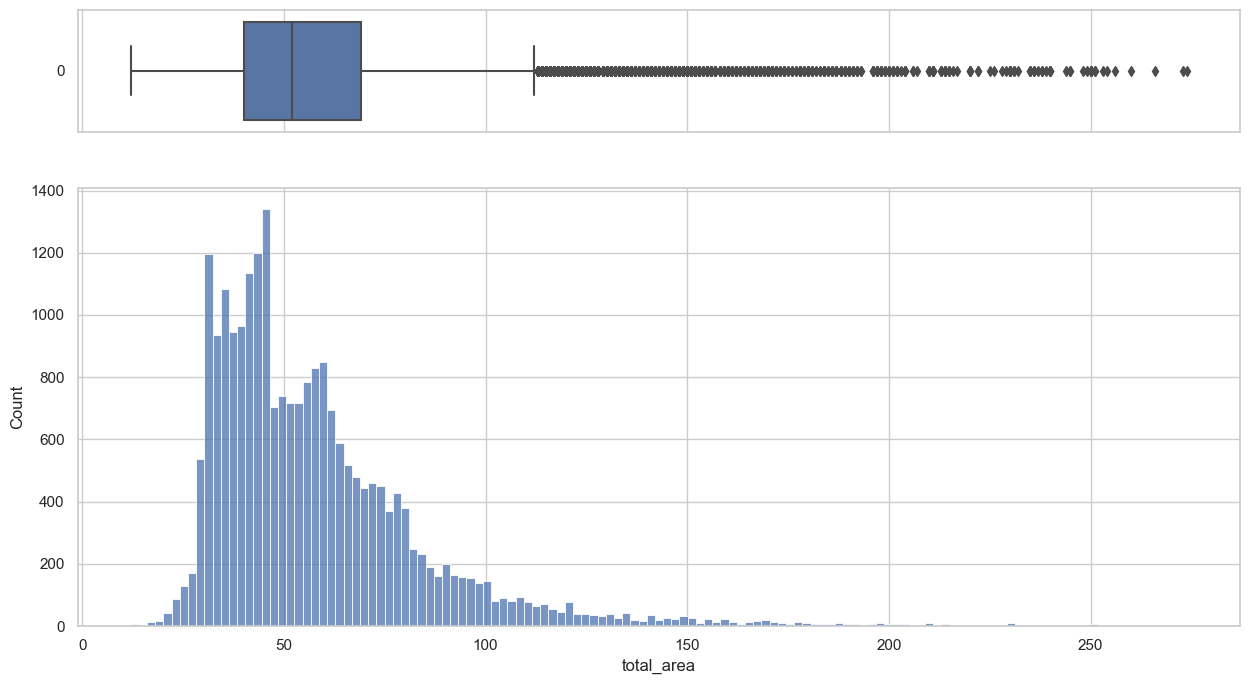

In [160]:
decor(data_fin["total_area"])


Распределение нормальное, выбросами (>120 кв.м.) представлен элитный и редкий сегмент недвижимости. Наибольшую долю рынка представляет сегмент от 30 до 40 кв.м. Чуть меньше доля квартир от 40 до 60 кв.м.

### living_area

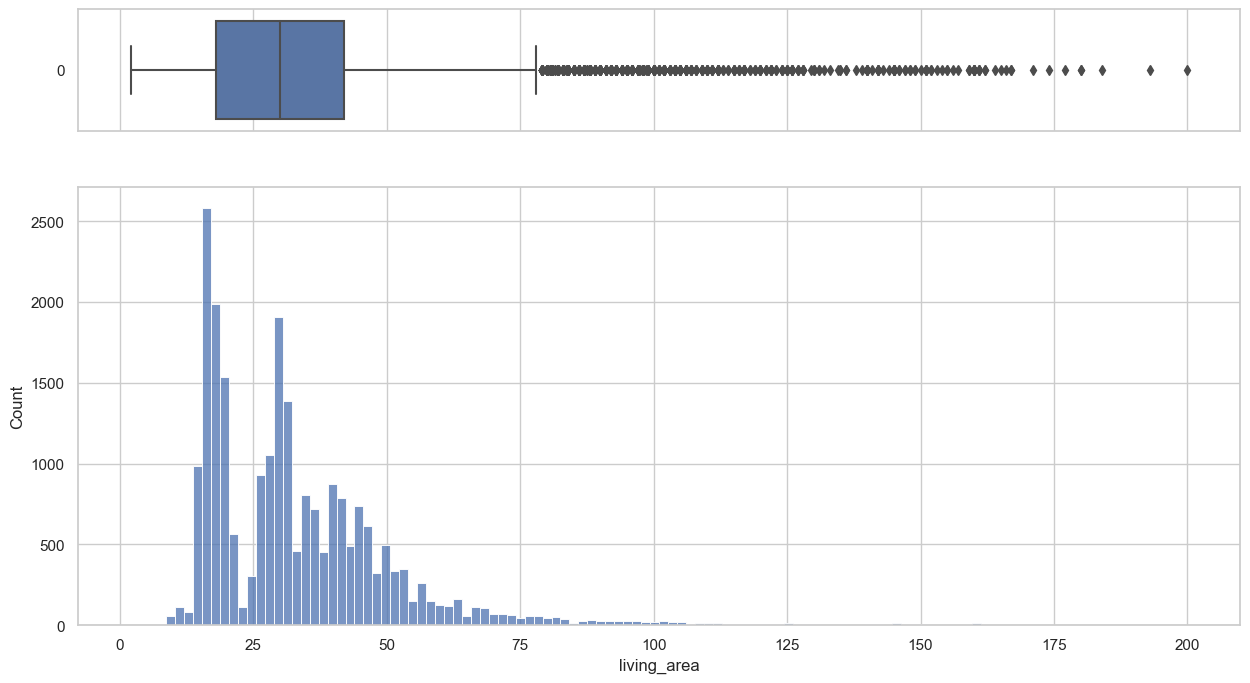

In [161]:
decor(data_fin.living_area)

Распределение похоже на нормальное, но есть провал в области 25 кв.м., что вполне соответствует небольшому провало по общей площади в области 50 кв.м. Наибольшая часть жилой площади представлена в области 20 кв.м. Это связано с тем, что общая площадь от 30 до 40 кв. м. Выбросы > 80 приходятся на элитную недвижимость

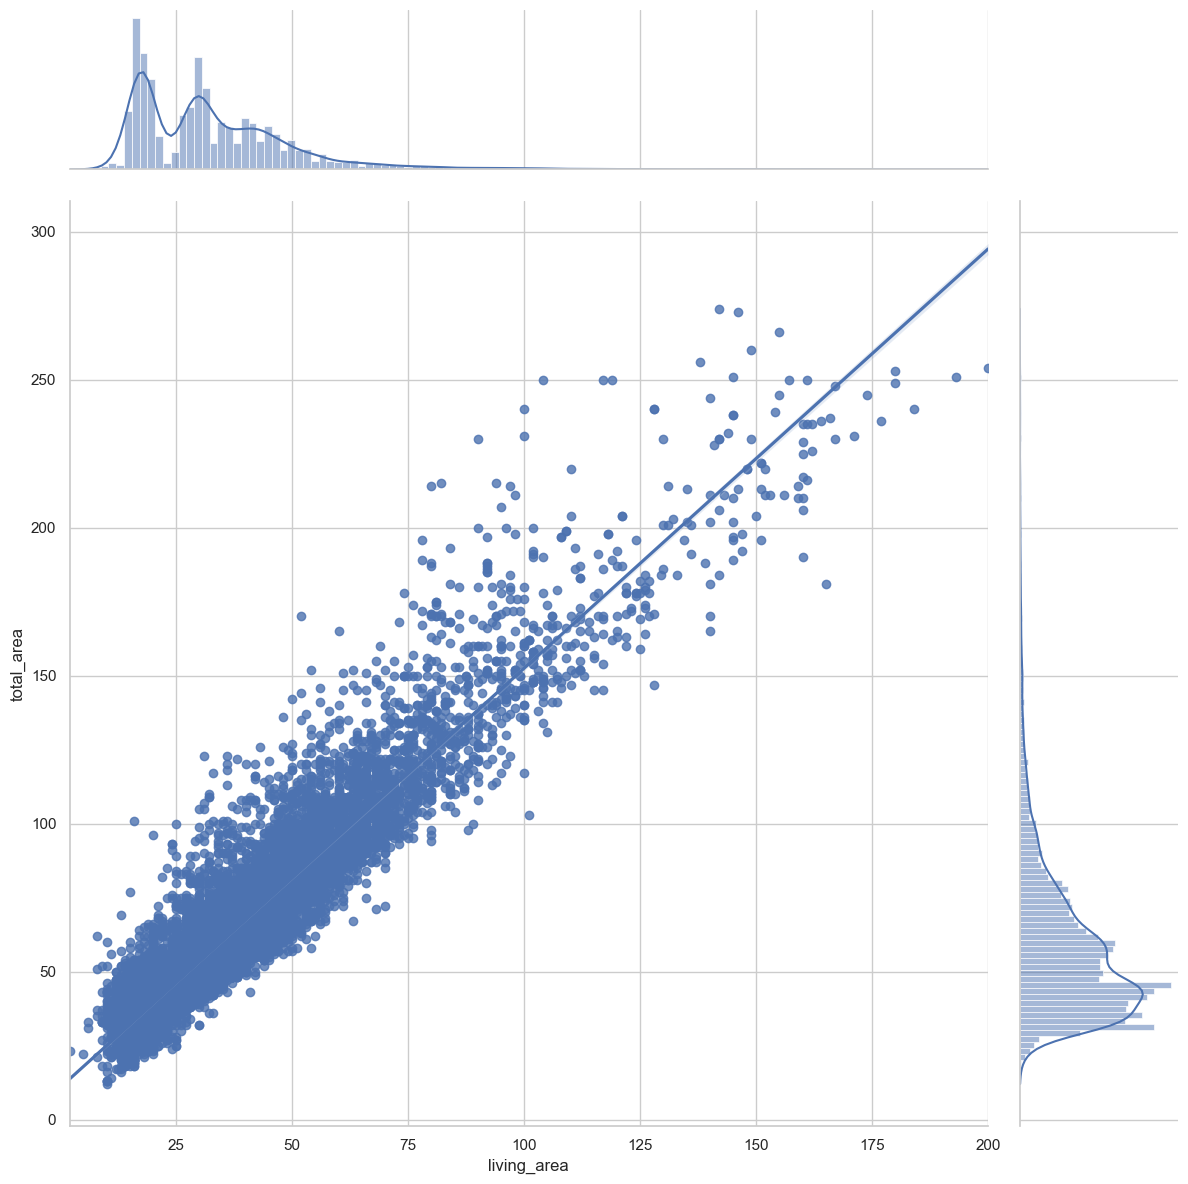

In [162]:
sns.jointplot(x=data_fin.living_area, y=data_fin["total_area"], 
              kind='reg', height=12)
plt.show()

### kitchen_area

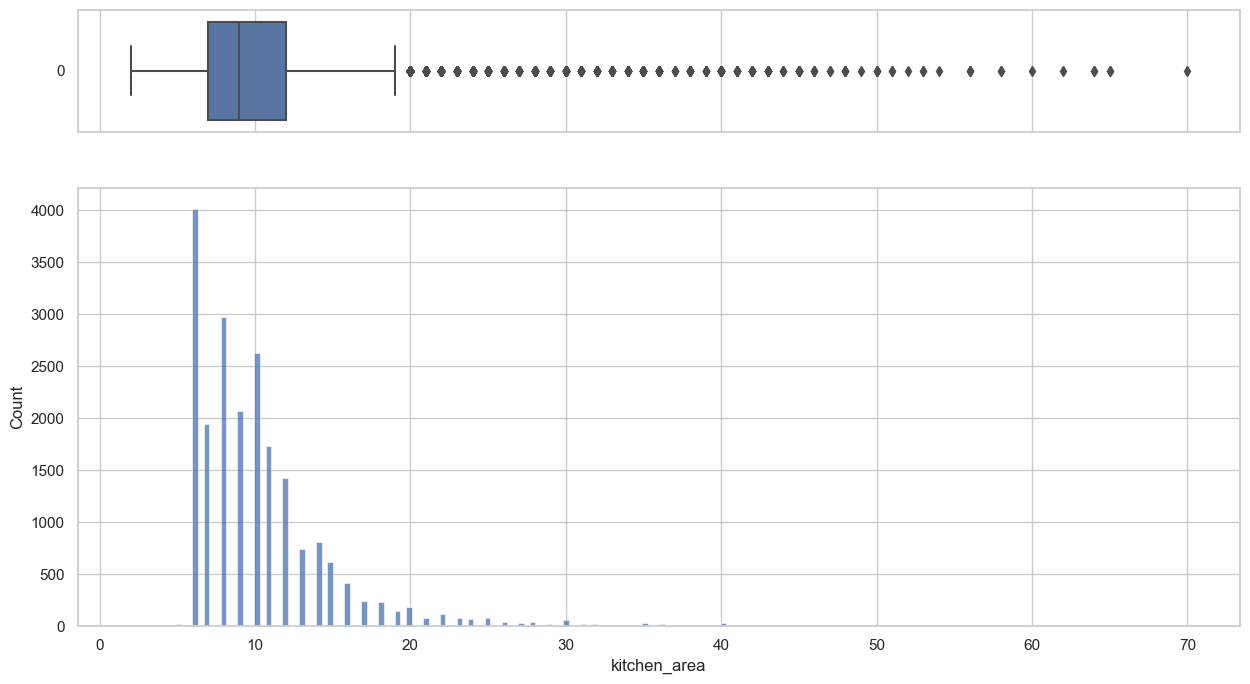

In [163]:
decor(data_fin.kitchen_area)

Из-за корректировки данных, гистограмма мало напоминает нормальное распределение, потому что есть обрезанность данных до 6 кв.м., которые представляют наибольшую долю всех площадей. Объяснение этому есть в разделе корректировки данных по данному столбцу. 8 и 10 кв.м. - вторая и третья по количеству площади кухни. Доля выбросов, то есть элитной недвижимости, начинается от ~18 кв.м.

### last_price

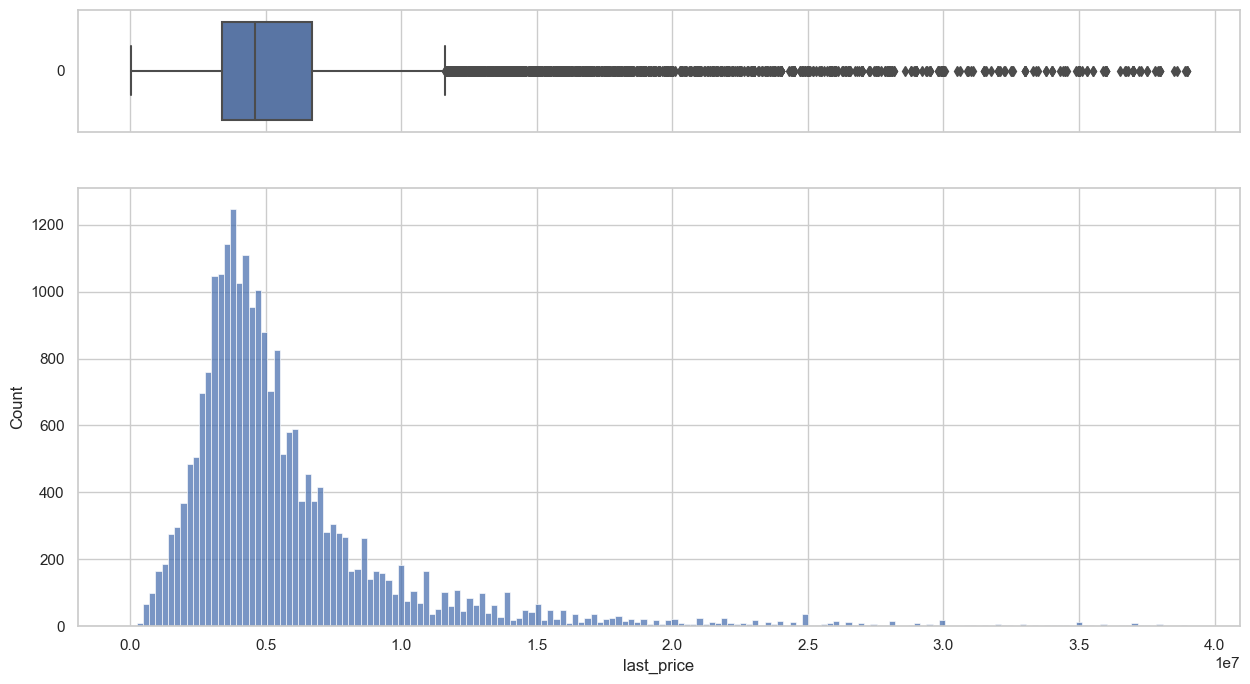

In [164]:
decor(data_fin.last_price)

Распределение нормальное. Пик приходится на 3,000,000 (на квартиры 30 кв.м). Цена на элитную недвижимость начинаются 12,000,000 (судя по году данных, вполне возможные цифры).

### rooms

<AxesSubplot:>

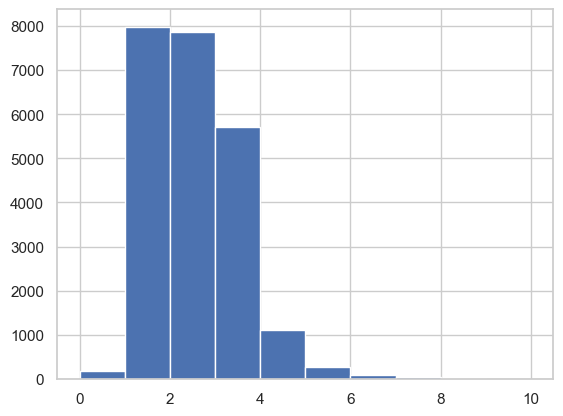

In [165]:
data_fin.rooms.hist()

Чаще всего, количество комнат в квартире 1 или 2, для квартир 30-40 кв.м. Реже - 3 или 4 комнаты. От 6 комнат начинается элитная и очень дорогая недвижимость (12 млн). 0 комнат представляют собой студии, которых довольно-таки мало, на уровне квартир с 5-ю комнатами

### ceiling_height

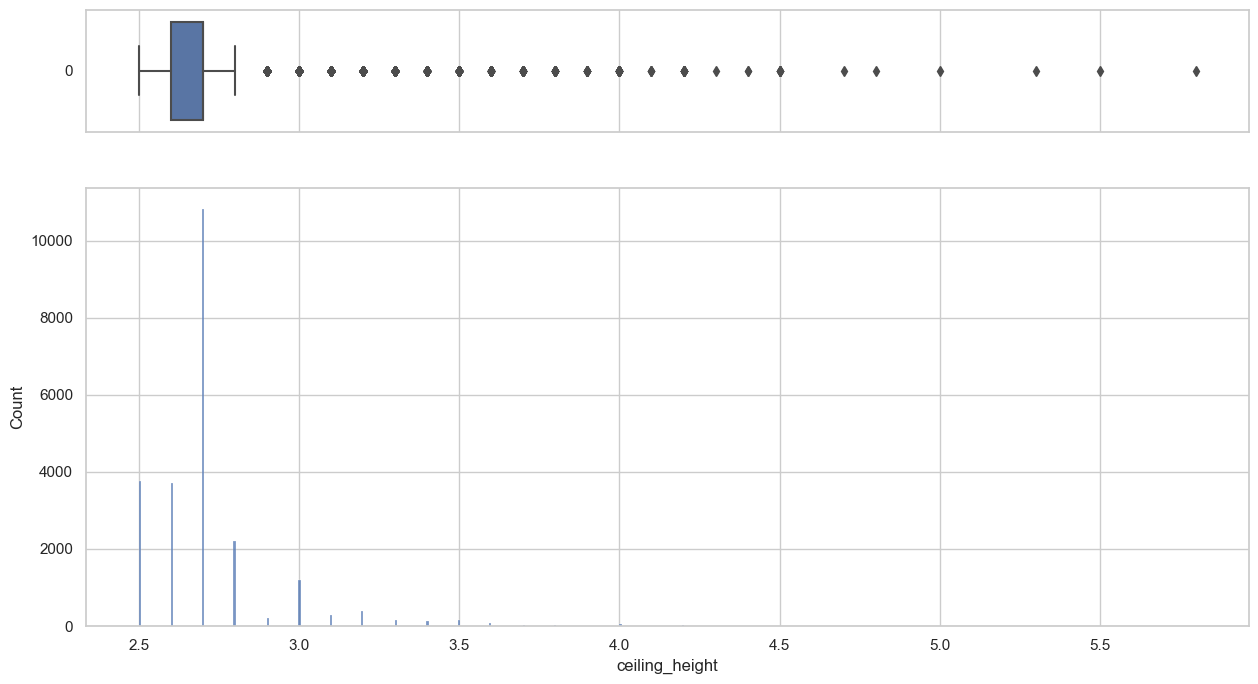

In [166]:
decor(data_fin.ceiling_height)

Самое частое значение высоты потолков - 2.7 метра, потому что именно этим значением, были заполнены пропуски (см. заполнение пропусков для данного столбца). Примерно в два раза меньше значений приходится на квартиры с потолками 2.5 и 2.6 метров. Если же необходимы высокие потолки, то они приходятся на сегмент элитной недвижимости

### floor

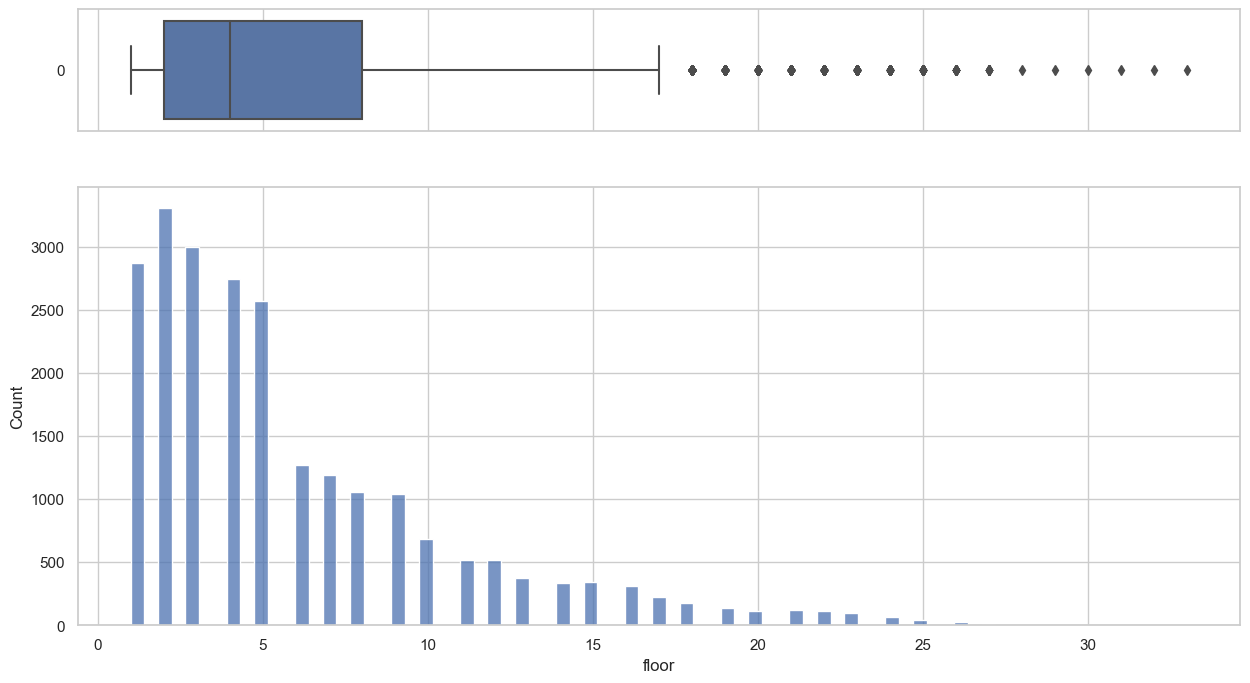

In [167]:
decor(data_fin.floor)

В основном, на продажу выставлены квартиры, находящиеся с 1-го по 5-ый этаж. Жилье в высотках, от 17-го этажа, продается крайне редко - новостройки еще не отслужили свой срок их владельцам. С 6-го по 176-этажи продают охотней.

### type_floor

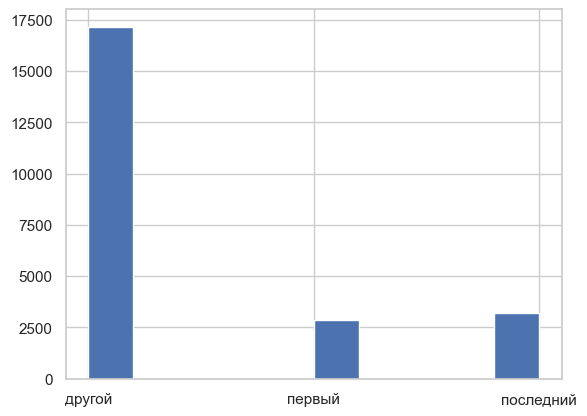

In [168]:
data_fin.type_floor.hist()
plt.show()

Первый и последний этаж практически не выставляют на продажу, потому как они самые нерентабельные на рынке недвижимости и самый проблемные для проживания. На последнем этаже - жара круглый год, крыша протекает, вследствие чего может образовываться плесень. На первом этаже всегда холодно, прохожие заглядывают в окна, могут залезть воры.

### floors_total

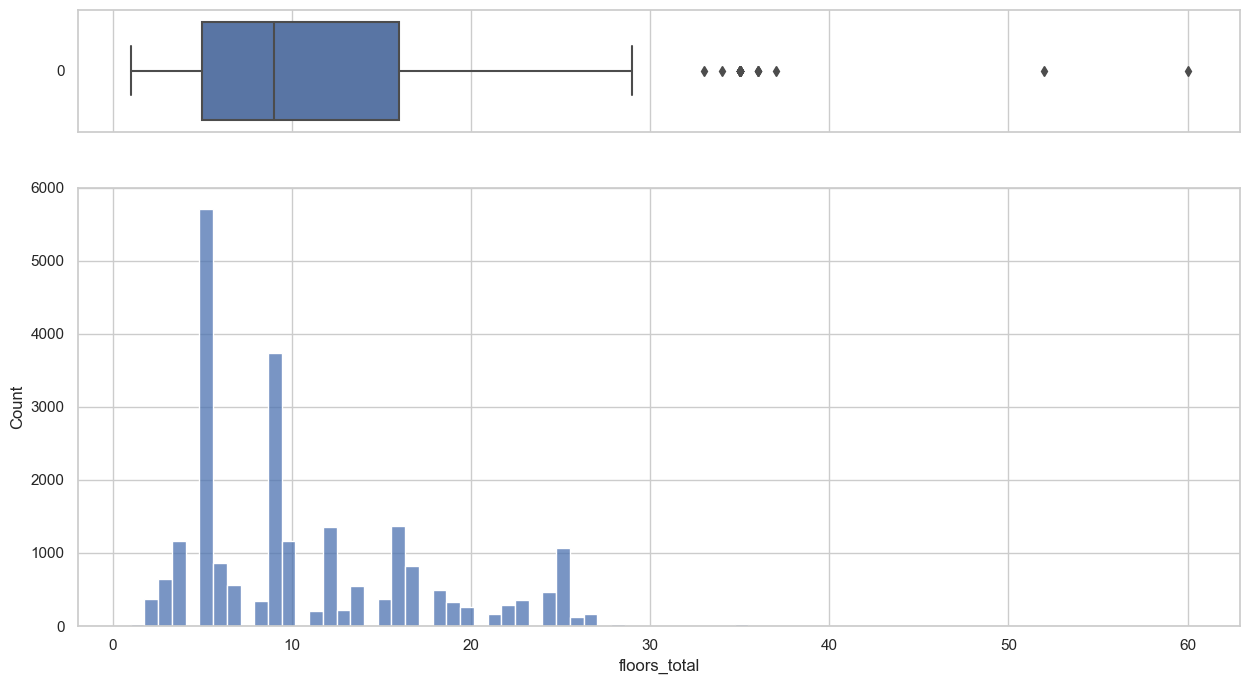

In [169]:
decor(data_fin.floors_total)

Пики этажности приходятся на наиболее эксплуатирумые в России этажности домов, которые были определены на этапе подготовки данных. Выбросы более 32 этажей так же решено было оставить, хотя это аномальные значения для Санкт-Петербурга

### citycenters_nearest

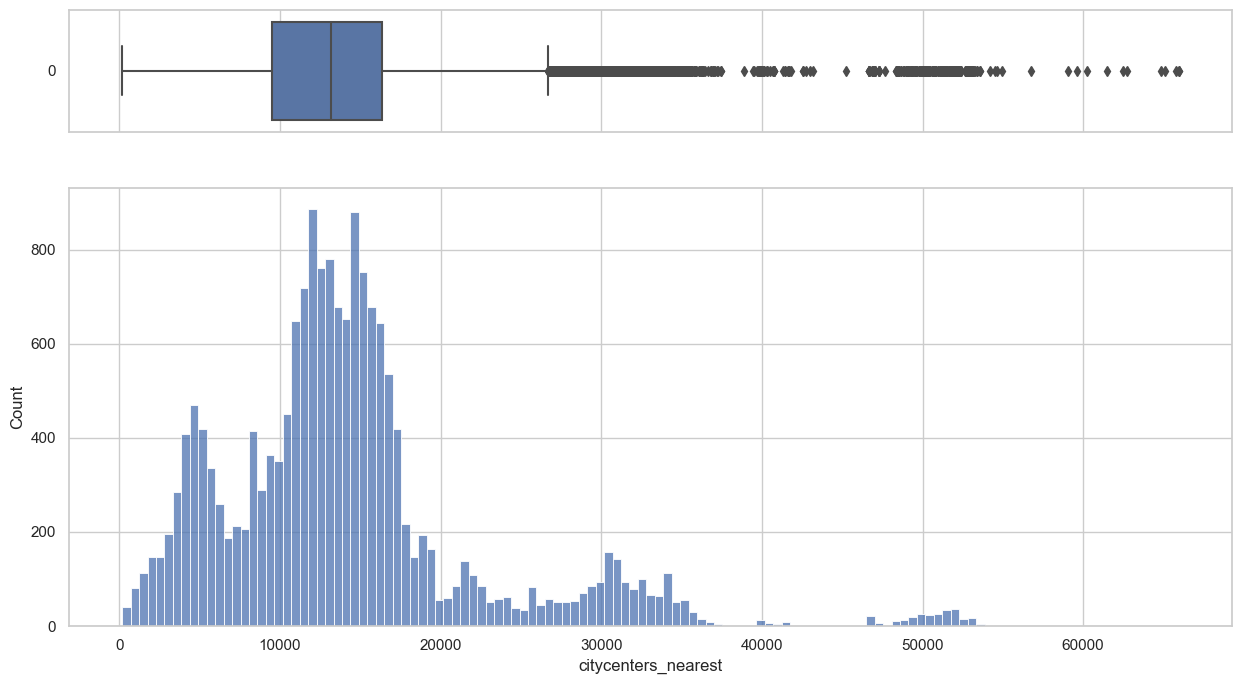

In [170]:
decor(data_fin.citycenters_nearest)

Есть квартиры, расположенные в центре, большая часть квартир находится на расстоянии 15 тыс. м. от центра. Из чего следует вывод, что основная часть квартир продается в городе Санкт-Петербург

### airports_nearest

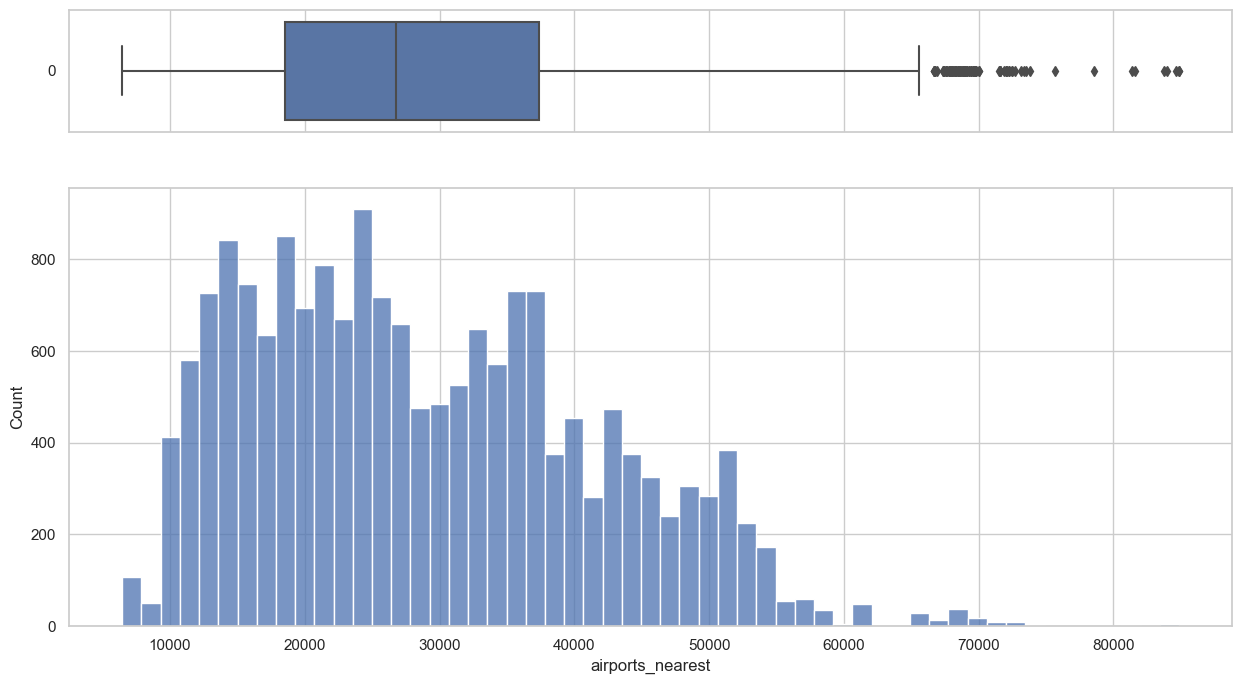

In [171]:
decor(data_fin.airports_nearest)


Основной сегмент квартир приходится на квартиры, расположенные близко к аэропорту, в пределах 40 тыс. м. Прилегающих к аэропорту квартир (до 10 тыс. м.) порядка 500 

### parks_nearest

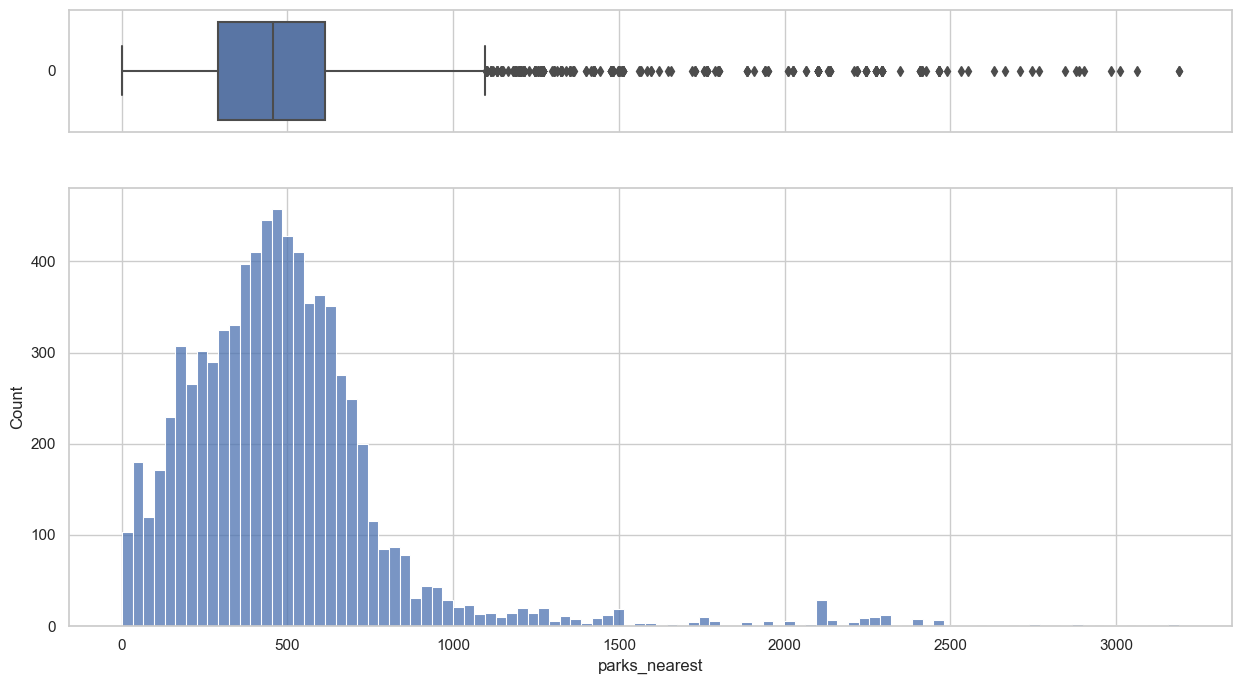

In [172]:
decor(data_fin.parks_nearest)

Большинство квартир расположены в зеленых районах, с парками в пределах 500 метров. Количество квартир удаленных от парков более чем на 1000 метров, не превышает 100

### citycenters_nearest

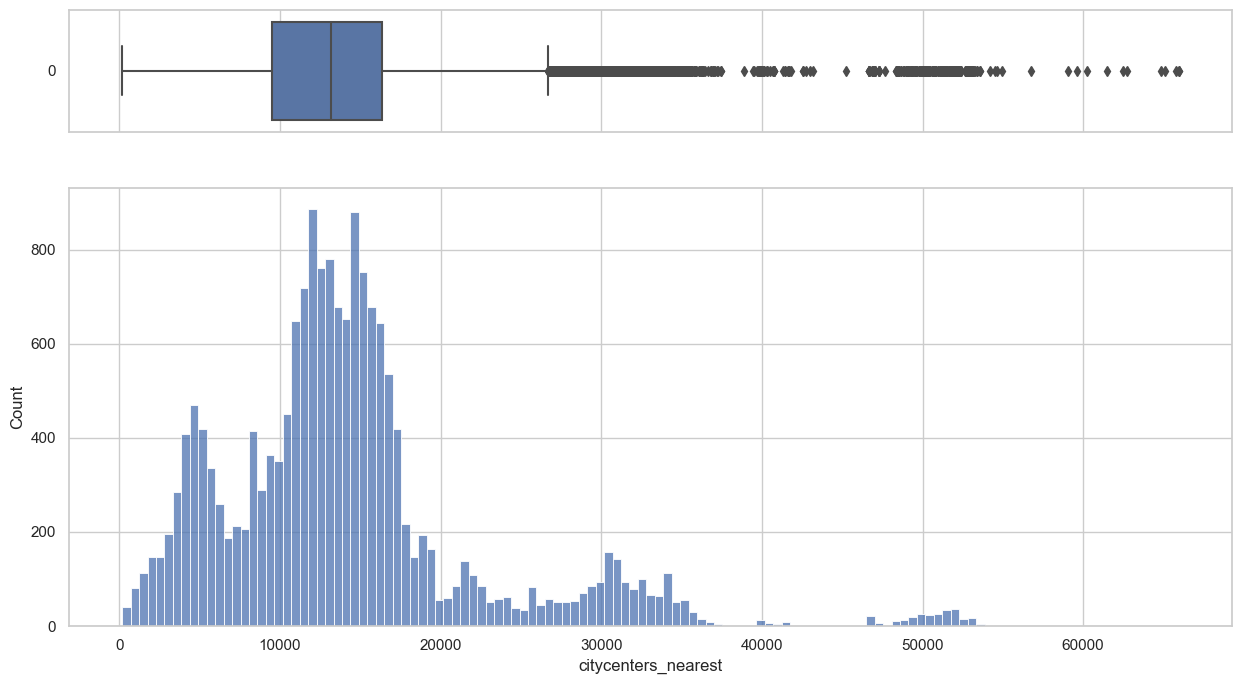

In [173]:
decor(data_fin.citycenters_nearest)

Большинство квартир находится в пределах центра того населенного пункта, где они расположены. Это подтверждает два всплекса на гистограмме на удаленности от центра порядка 5000 м и в области от 13000 м до 15000 м.

### day_exposition and year_exposition

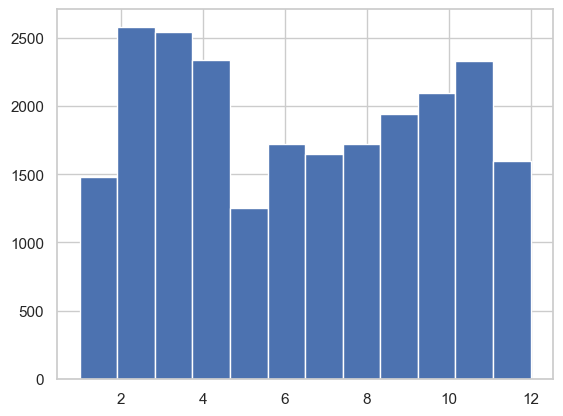

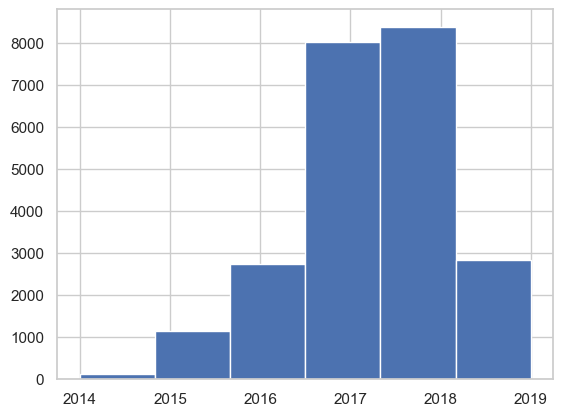

In [174]:
plt.hist(data_fin[data_fin["month_exposition"].notna()]["month_exposition"], bins=12)
plt.show()
plt.hist(data_fin[data_fin["year_exposition"].notna()]["year_exposition"], bins=6)
plt.show()

На февраль, март, апрель и ноябрь приходится наибольшее количество размещений объявлений, как на самый продуктивные и эффективные месяцы. Естественная просадка наблюдается в январе и мае - месяцы с наибольшим количеством нерабочих дней.

Распределение по годам показывает всплеск активного размещения в 2011-2018 гг., что объясняется осложненной геополитической ситуацией на фоне макроэкономического кризиса.

### fast sell

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
Постройте гистограмму.

Посчитайте среднее и медиану.

В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

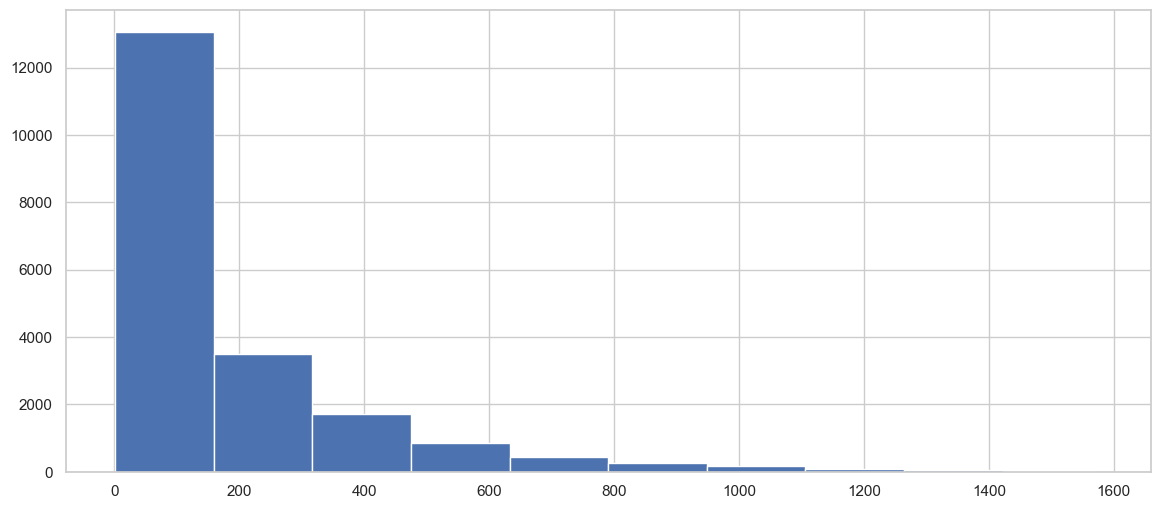

In [175]:
plt.figure(figsize=(14, 6))
plt.hist(data_fin[data_fin["days_exposition"].notna()]["days_exposition"])
plt.show()

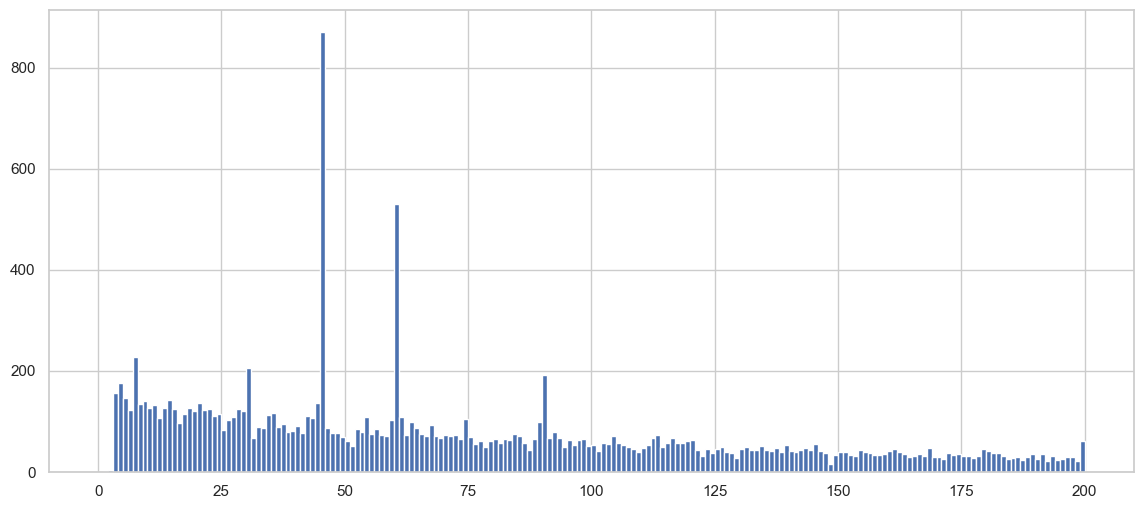

In [176]:
plt.figure(figsize=(14, 6))
plt.hist(data_fin[data_fin["days_exposition"].notna()]["days_exposition"], range=(0, 200), bins=200) 
plt.show()

In [177]:
data_fin.days_exposition.describe()

count    20146.000000
mean       179.943115
std        218.864813
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Срок размещения лежит в очень широком диапазоне. Есть как "быстрые" объявления, которые были размещены менее трех месяцев, так и те, которые оставались невостребованными около года. Наибольшую долю составляют именно "быстрые" объявления. Средний период размещения составляет около 3 месяцев. То есть "быстрые" объявления говорят о быстрой продаже и наоборот

### price depending

Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:
*   общей площади;
*   жилой площади;
*   площади кухни;
*   количества комнат;
*   этажа, на котором расположена квартира (первый, последний, другой);
*   даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

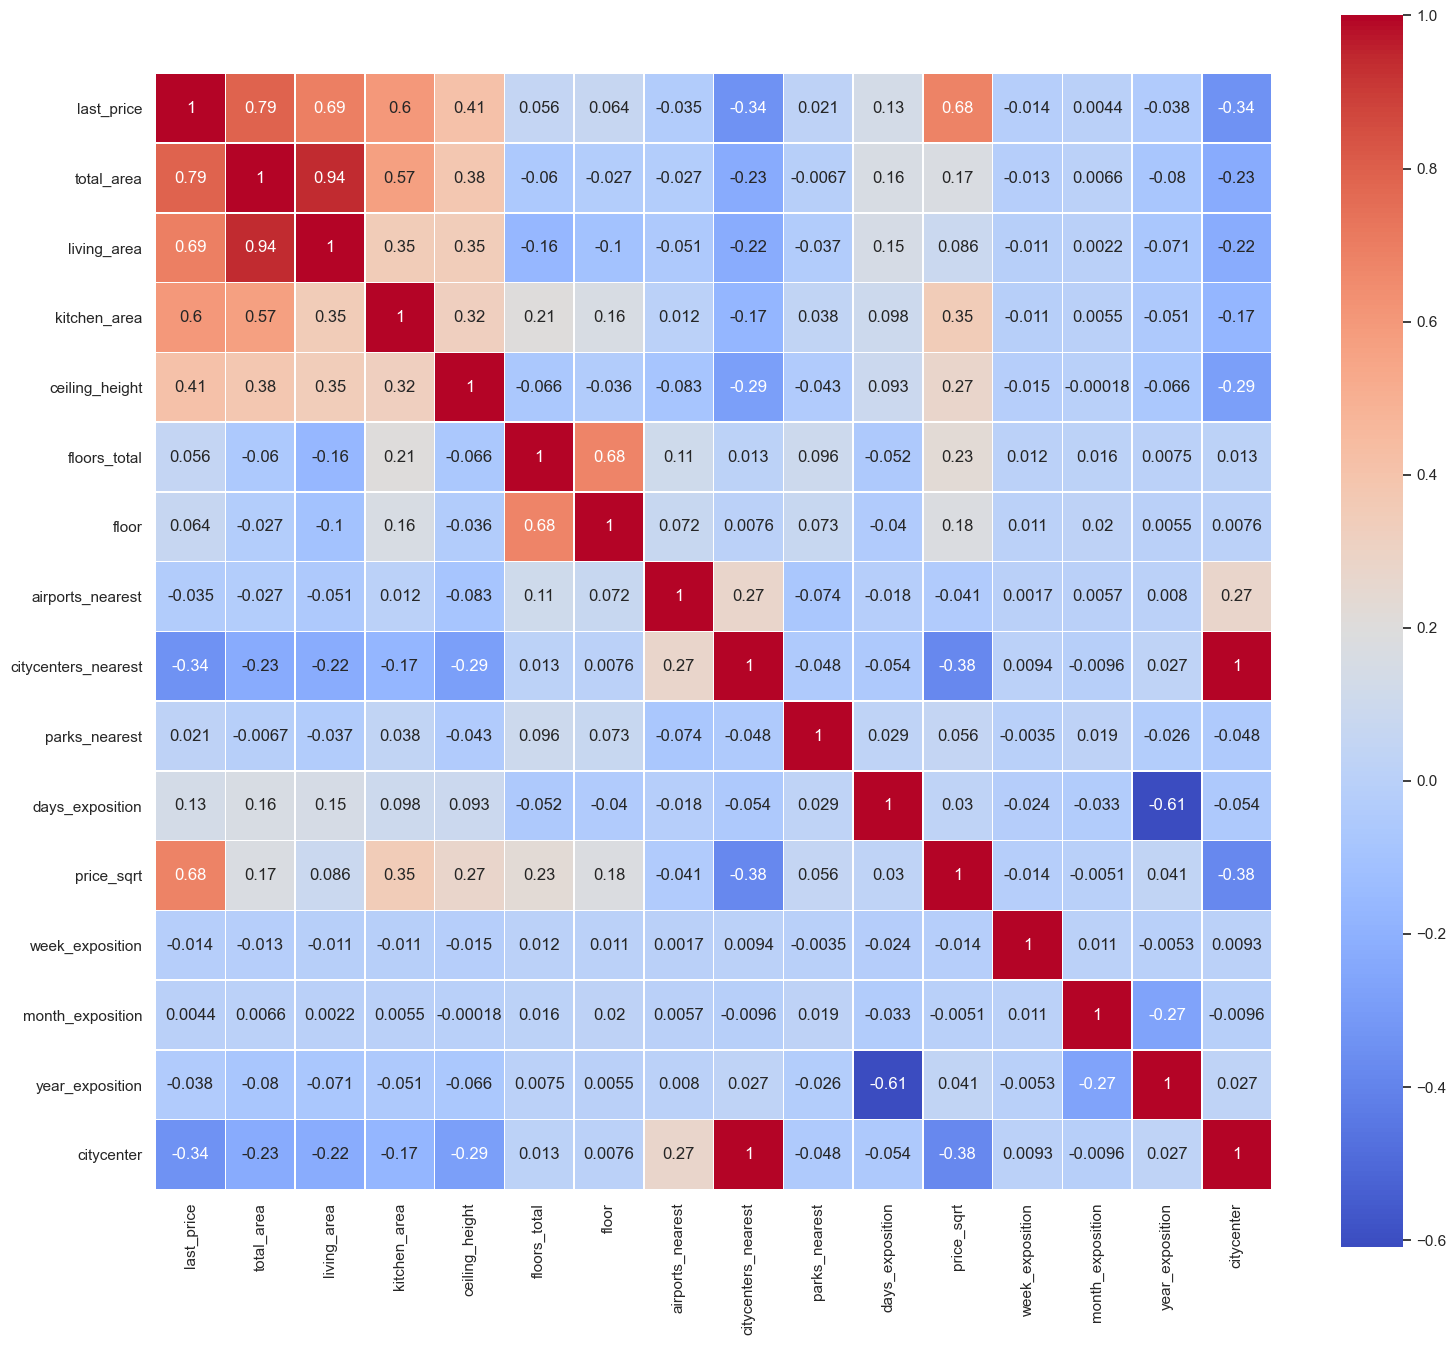

In [178]:
df_corr=data_fin.corr()
plt.figure(figsize=(18,16))
sns.heatmap(df_corr, annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

По тепловой карте можно увидеть, что наибольшая зависимость стоимость от общей площади квартиры - коэффициент корреляции 0.79,
жилой площади, как составной общей площади - коэффициент корреляции 0.69, площади кухни, как составной общей площади - коэффициент корреляции 0.6 и от высоты потолков - коэффициент корреляции 0.41.

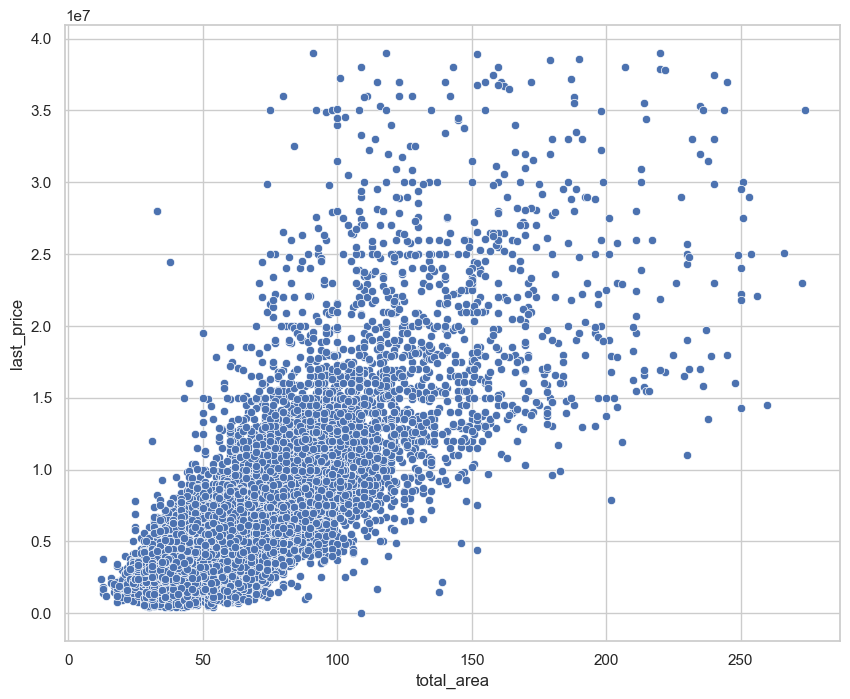

In [179]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="total_area", y="last_price")
sns.set_style("whitegrid")

Наблюдается явная положительная корреляция, что подтверждает показатели тепловой карты выше: стоимость квартиры зависит от ее площади. Наблюдаем разброс значений, который определяет наличие элитной недвижимости

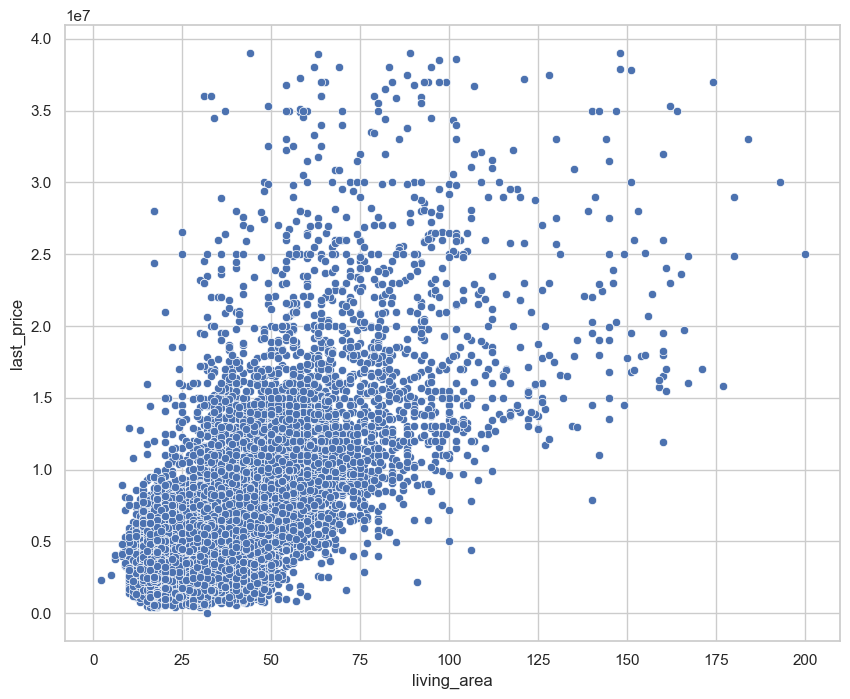

In [180]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="living_area", y="last_price")
sns.set_style("whitegrid")

На графике зависимости прослеживается корреляция, хоть и с большим разбросом значений для сегмента элитной недвижимости

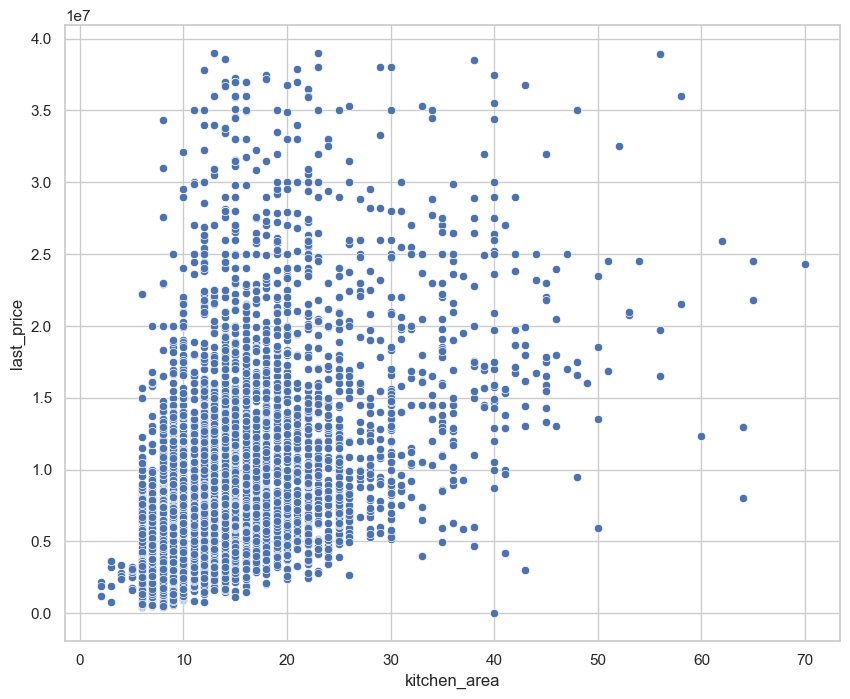

In [181]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="kitchen_area", y="last_price")
sns.set_style("whitegrid")

Видна коррэляция значений, что говорит о зависимости цены от площади кухни, но в меньше степени, чем от жилой или общей площадей. Так же присутствует большой разброс значений для сектора элитной недвижимости 

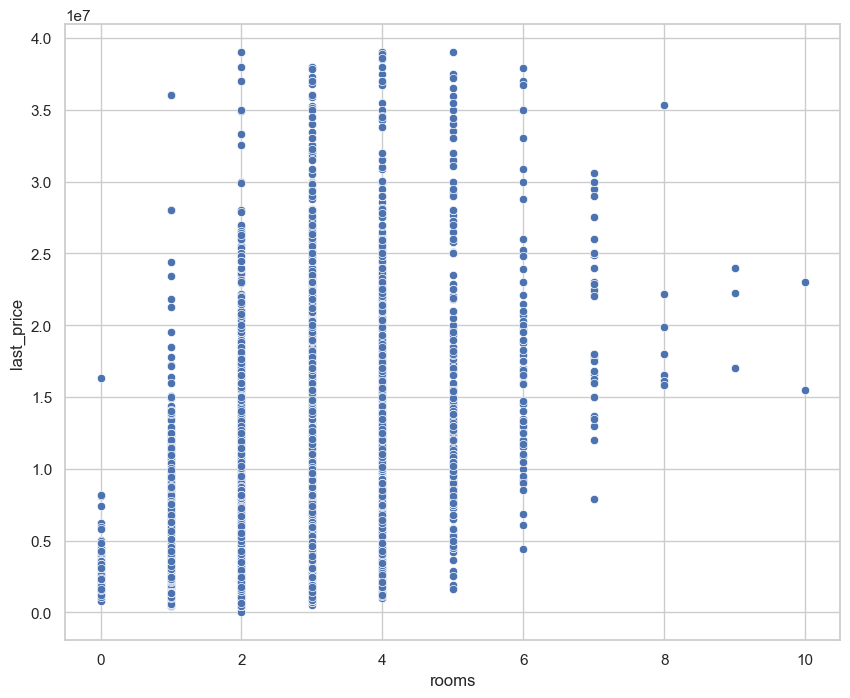

In [182]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="rooms", y="last_price")
sns.set_style("whitegrid")

Явной зависимости цены от количества комнат не наблюдается, между квартирами с 2, 3, 4, 5 комнатами цена распределяется примерно равномерно. Малое распределение цены по количеству комнат 0, 7 и больше объясняется малым количеством наблюдений

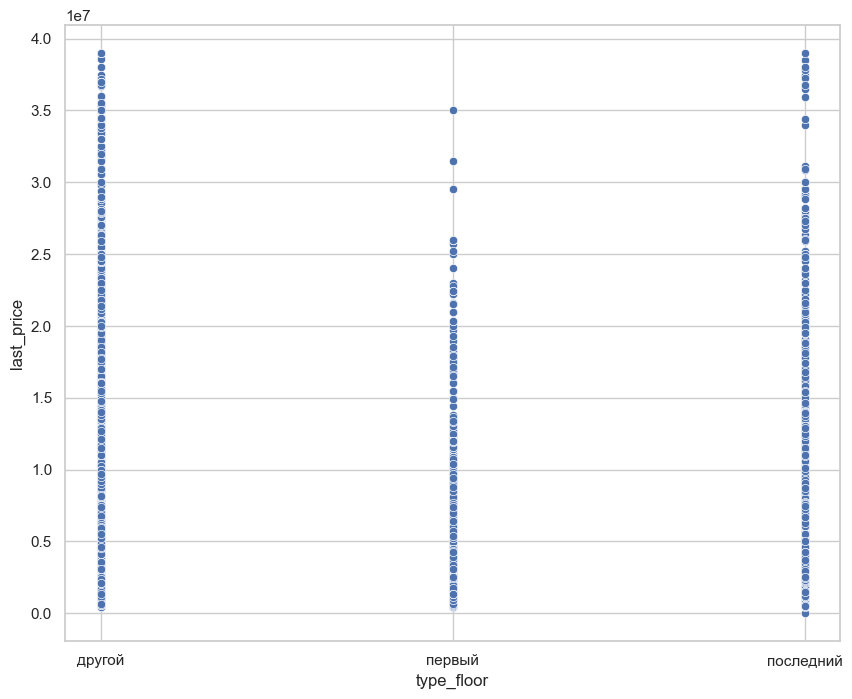

In [183]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="type_floor", y="last_price")
sns.set_style("whitegrid")

Распределение цены для первого этажа немного ниже, чем для других этажей. Для последнего этажа такой тенденции не наблюдается. Можно сказать, что для всех этажей, кроме первого, цена распределена равномерно

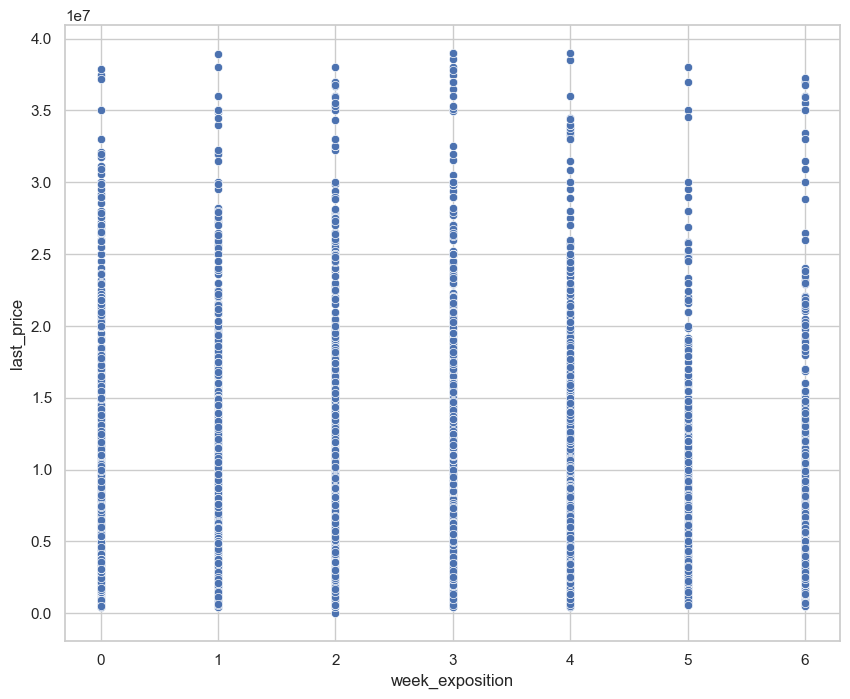

In [184]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="week_exposition", y="last_price")
sns.set_style("whitegrid")

По дням недели (0 - понедельник, 6 - воскресенье) распределение примерно одинаковое для рабочих дней, с понедельника по пятницу и немного снижается для выходных. Снижение цены для выходных незначительно и связано с количеством размещений, поэтому можно сказать, что зависимости между ценой и днем недели - нет

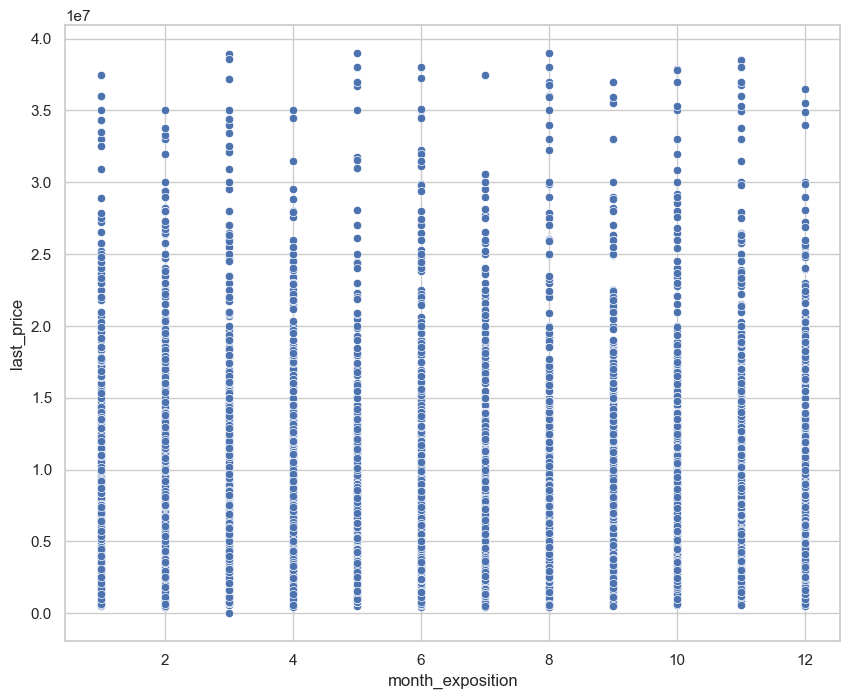

In [185]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="month_exposition", y="last_price")
sns.set_style("whitegrid")

Традиционно меньше всего объявлений размещают в отпускной период - с апреля(4) по сентябрь(9). Декабрь(1) и январь(12) так же не особо продуктивные месяцы. В то время как цены имеют хаотичный разброс в зависимости от месяца

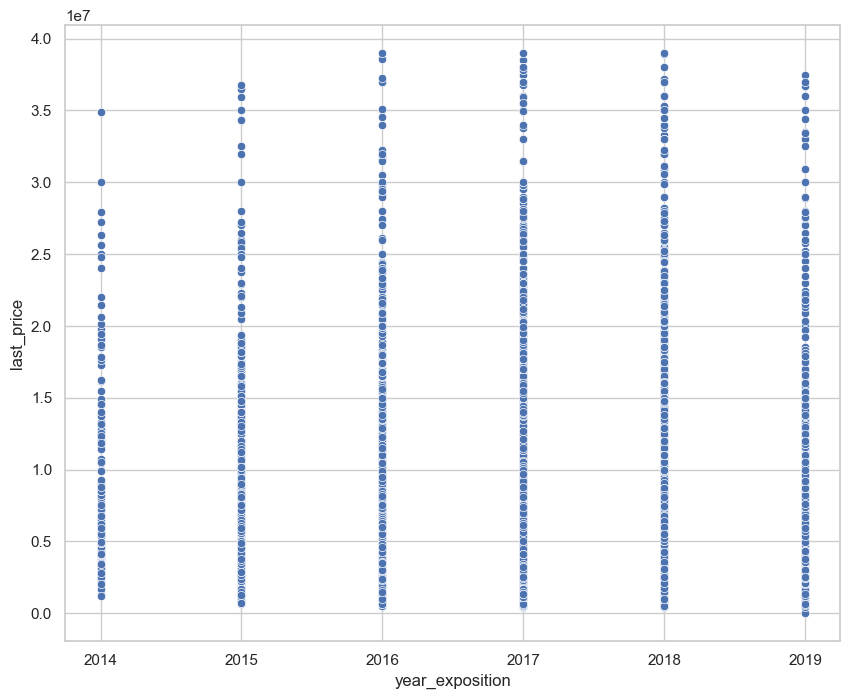

In [186]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_fin, x="year_exposition", y="last_price")
sns.set_style("whitegrid")

Разброс цен для 2015 - 2019 примерно одинаков. В 2014 году цены почти не превышали 30 млн. по причине соотношения курса доллара к рублю.

### price_sqrt depending

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.


In [187]:
sort_d = data_fin.label.value_counts().head(10)
sort_d

Санкт-Петербург    15397
Мурино               584
Кудрово              470
Шушары               438
Всеволожск           392
Пушкин               365
Колпино              334
Парголово            326
Гатчина              302
Выборг               231
Name: label, dtype: int64

In [188]:
head = data_fin.query("label in @sort_d.index").groupby("label")["price_sqrt"].mean()

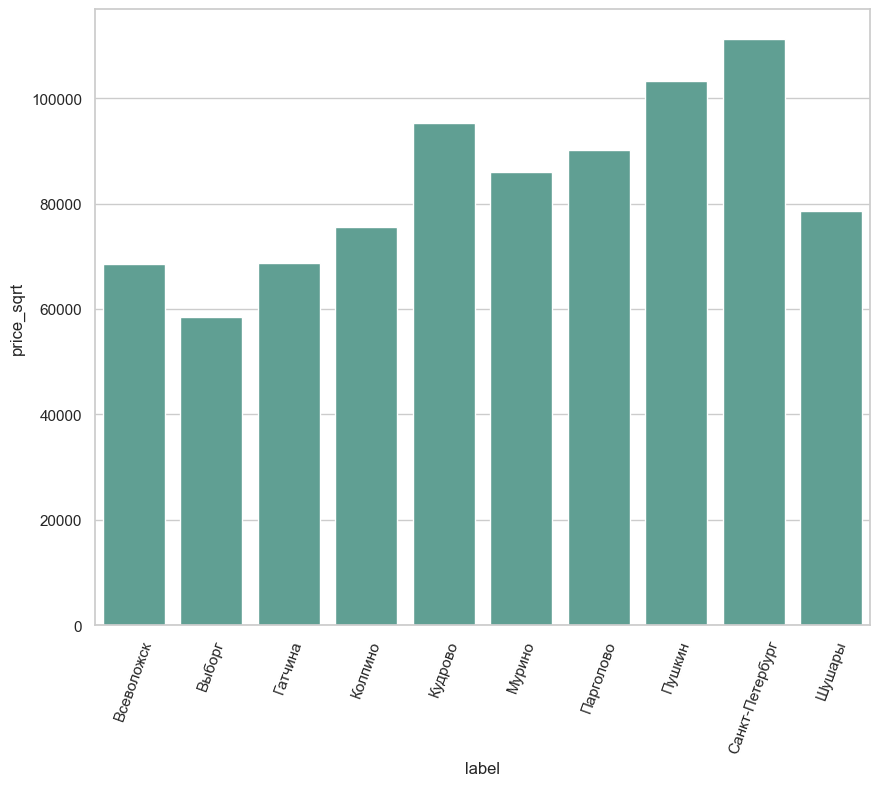

In [189]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
plt.xticks(rotation=70)
sns.barplot(x=head.index, y=head.values, color="#5A9")
plt.ylabel("price_sqrt")
plt.show()

Как и ожидалось, самая высокая цена в одном из самых крупных городов России - Санкт-Петербургеб свыше 100 тыс за квадратный метр. Самая низкая цена в области, в Выборге, ~58 тыс за квадртаный метр.

### price per km


Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [190]:
per_km = data_fin\
.loc[(data_fin.label == 'Санкт-Петербург')&
(data_fin.citycenter.notna())&
(data_fin.citycenter != 0)]\
.pivot_table(index="citycenter", values="last_price")
per_km.head()

,last_price
citycenter,
1,1.189759e+07
2,1.076318e+07
3,1.031565e+07
4,1.138845e+07
5,1.084493e+07


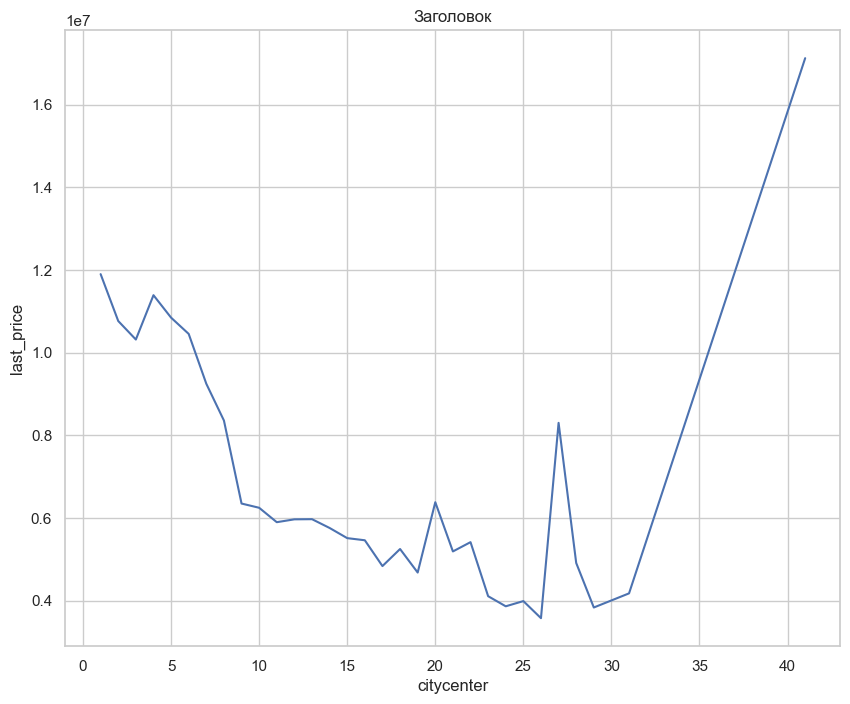

In [191]:
plt.figure(figsize=(10,8))
plt.plot(per_km.index, per_km.values)
plt.ylabel("last_price")
plt.xlabel("citycenter")
plt.title('Заголовок')
plt.show()

В зависимости от удаленности от центра цены на квартиры падают, наблюдаются так же всплески на значениях ~27 км и ~41 км, что соответствует населенным пунктам Петергоф и Зеленогорску (данные взяты из Яндекс.Карт).

## Общий вывод

In [192]:
(data.shape[0]-data_new.shape[0])

455

In [193]:
(data.shape[0]-data_new.shape[0])/data.shape[0]

0.019199122325836534

Была проведена обширная предподготовка данных. Для каждого столбца был изменен тип на менее затратный. Для столбцов `last_price`, `total_area`, `kitcher_area`, `ceiling_heights`, `living_area` был проведен дополнительный корреляционный анализ для нахождения зависимостей с целью заполнения пропущенных значений. Некоторые значения были удалены (455 строк), процент удаленных значений менее 2% (1.92%). Для столбцов - показателей принадлежности квартир к "зеленому" району("parks_nearest", "ponds_nearest" и т.д) и столбцов удаленности от аэропорта и центра, было решено оставить пропущенные значения, чтобы не вносить искажения в данные. Так же были изменены/удалены значения-выбросы, аномалии. Но большинство аномалий было оставлено в датасете по причине того, что этими аномалиями представлена элитная недвижимость.

Так же был проведен исследовательский анализ данных для нахождения зависимости цены, цены за квадратный метр от других параметров.



*   Наибольшую долю в данных представляют квартиры общей площадью от 30 до 40 кв.м.
*   Жилая площадь и площадь кухни у таких квартир в пределах 20 и 6 кв. м. соответственно. Количество комнат 1 или 2. Высота потолка 2.7 м. Расположение с 2-го по 5-ый этаж включительно.
*   Средняя цена на такую квартиру порядка 3 млн.
*   Больше всего объявлений о продаже в Петербурге - ~15 тыс., но средняя цена за квадратный метр одна из самый высоких - более 100 тыс. за кв.м. Намного скромнее по количеству объявлений и цене Выборг, пригород Петербурга. Всего ~200 объявлений со средней ценой за кв. м. чуть менее 60 тыс.
*   Доступность аэропорта у большинства квартир составляет 40 км, что не так уж и далеко при общей развитости транспортной системы в России.
*   Квартиры так же находятся, в большинстве своем, в зеленых районах, с шаговой доступностью до парков.
*   При желании купить одну из таких квартир, необходимо в течение 45 дней или 1,5 месяцев успеть присмотреть и выкупить подходящий вариант, потому что именно таков минимальный срок объявлений.
*   При покупке стоит обратить внимание, что цена зависит от общей площади и ее составляющих(жилая площадь, площадь кухни), от высоты потолков и, как уже говорилось выше, от местоположения.









**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод